#                                    Logistics Regression - Case Study 

# Problem Statement

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

The company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

 The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study
### There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Import necessary libaray required for this Case Study
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Warnings, to supress warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#  Import required Stats lib
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Configuring set_option to view all the rows & columns in the dataframe
pd.set_option("display.max_columns" , 300)
pd.set_option("display.max_rows" , 300)

# We need to identify the Major Steps to achive our Goal

####  1.  Data Import & Study
####  2.  Data Cleaning 
####  3.  Data Analysis (EDA)
####  4.  Data Preparation
####  5.  Model Development 
####  6.  Validate Model
####  7.  Final Conclusion 

# 1. Data Import & Study

In [5]:
# Reading the Leads Dataframe
df_lead_raw = pd.read_csv('Leads.csv')

In [6]:
# Checking the first 5 rows of the data
df_lead_raw.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Checking the bottom 5 rows
df_lead_raw.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [8]:
# Checking the shape of the Leads Dataframe
df_lead_raw.shape

(9240, 37)

In [9]:
# Checking the total row, columns, datatype of each column & notNull count for each column
df_lead_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Checking the Statistical values for each attribute
df_lead_raw.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Observations:
- Column 'Lead Number' seems to be some Unique ID same as Index and not useful for our analysis and we can drop this column
- Column 'Prospect ID' seems to be another id or which might not be useful for our analysis and can be dropped
- No negative values observed.
- Many missing values in columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' and these columns can be droped.

# 2. Data Cleaning

In [11]:
# Check for Duplicate records in the data
df_lead_raw.duplicated().sum()

0

In [12]:
#  Check for Duplicate records for Prospect ID 
sum(df_lead_raw.duplicated(subset = 'Prospect ID'))

0

In [13]:
#  Check for Duplicate records for Lead Number
sum(df_lead_raw.duplicated(subset = 'Lead Number'))

0

In [14]:
# Lets create a list of columns that can be dropped 
skewed_cols = ['Prospect ID' , 'Lead Number']

In [15]:
# Assigning proper Datatype to columns of Dataframe, if required
print(f'{df_lead_raw.info()}', end="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Inferences :
- No Duplicates identified.
- Based on the above information No need to change any column datatype.  

#### Lets identify the missing data

In [16]:
# lets  Check for Null Values in the Lead Data Frame 
round(100*(df_lead_raw.isnull().sum()/len(df_lead_raw.index)),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

#####   As part of Data Cleaning activities. Let us drop columns which has Null Value > 35%.   Since Those data will mislead our model and not required 

In [17]:
# Drop the Columns having missing values greater than 35% (see above data - Asymmetrique Activity Index,Asymmetrique Profile Index,
#Asymmetrique Activity Score , Asymmetrique Profile Score and Lead Quality as more missing values)

cols = df_lead_raw.columns

for i in cols:
    if((100*(df_lead_raw[i].isnull().sum()/len(df_lead_raw.index))) >= 35):
        df_lead_raw.drop(i, 1, inplace = True)


In [18]:
# Checking again Dataset for Missing Values after Droping Columns Greater than 35% 
round(100*(df_lead_raw.isnull().sum()/len(df_lead_raw.index)), 2).sort_values(ascending= False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Call                                       0.00
Last Notable Activity                             0.00
A free cop

In [19]:
# Lets check the rows & columns available afte dropping the high null values columns.
df_lead_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### After Droping columns with  Missing Values > 35%,  We need to Analyse rest of the column Missing values and apply appropriate Treatement

##### Lets Analyse the columns with missing values between 15% - 35% and impute with the most frequent sub catergory / Mean or Median value.

- What matters most to you in choosing a course
- Lead Profile
- What is your current occupation
- Country
- How did you hear about X Education
- Specialization
- City

In [20]:
# creating a function to print value counts for each sub- category in the categorical column & to plot the count plot 

def sub_categories_counts_plot(col_name):
    
    # TO print the value counts for each cubcategory/class
    
    print("Value Counts for the column : ", col_name) 
    print(df_lead_raw[col_name].value_counts(dropna=False , normalize = True) * 100)
    print('\n')
    print("Count_Plot-", col_name)
    print('\n')
    
    # Creating a function for the count plot
    
    plt.figure(figsize = (15,5))
    sns.countplot(df_lead_raw[col_name])
    plt.xticks(rotation = 90)
    plt.show()
       

#### What matters most to you in choosing a course

Value Counts for the column :  What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


Count_Plot- What matters most to you in choosing a course




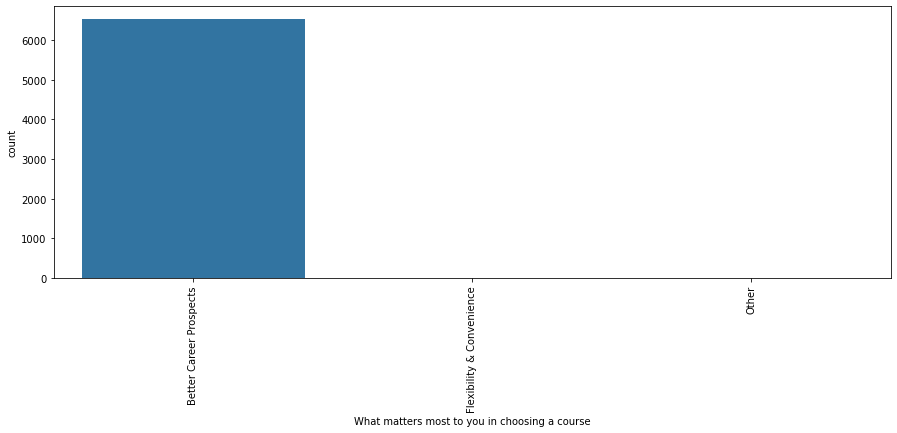

In [21]:
# Lets inspect the column value counts & impute the missing values for "What matters most to you in choosing a course"

sub_categories_counts_plot('What matters most to you in choosing a course')

####  Based on the above analysis Let us update the NaN values as "Better Career Prospects"

In [22]:
#  Lets impute the missing value with the most frequent value "Better Career Prospects"

df_lead_raw['What matters most to you in choosing a course'].fillna( df_lead_raw['What matters most to you in choosing a course'].mode()[0], inplace = True)

Value Counts for the column :  What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


Count_Plot- What matters most to you in choosing a course




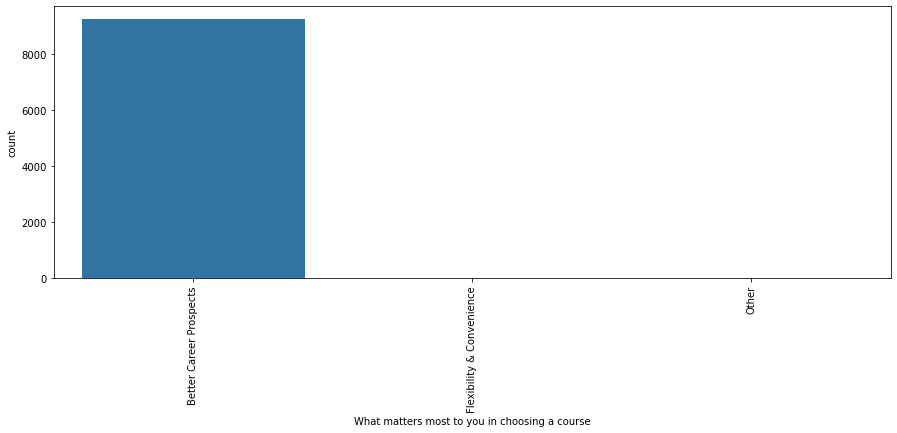

In [23]:
# Lets inspect the column after imputation

sub_categories_counts_plot('What matters most to you in choosing a course')

Insights:
- Most of the leads have opted "Better Career Prospects"

In [24]:
#  What matters most to you in choosing a course Column is highly Skewed Categorical Column,  We can drop this from our data set.  

skewed_cols.append('What matters most to you in choosing a course')

#### Lead Profile

Value Counts for the column :  Lead Profile
Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64


Count_Plot- Lead Profile




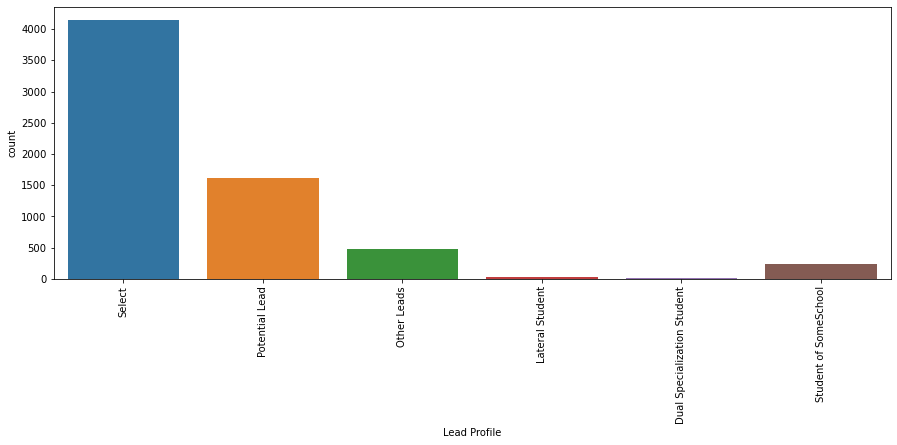

In [25]:
# Lets inspect the column calue counts for the column "Lead Profile"

sub_categories_counts_plot('Lead Profile')

- 'Select' option seems to be no reasonable and it means the lead has not specified and is same as 'NaN'. 
- If we make the 'Select' as 'Nan', then a total of 44.87 + 29.31 = 54.18
- Hence missing data is greater than 35%, we can drop this column

In [26]:
# "Lead Profile" Column is highly Skewed Categorical Column,  We can drop this from our data set.  

skewed_cols.append('Lead Profile')

#### What is your current occupation

Value Counts for the column :  What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64


Count_Plot- What is your current occupation




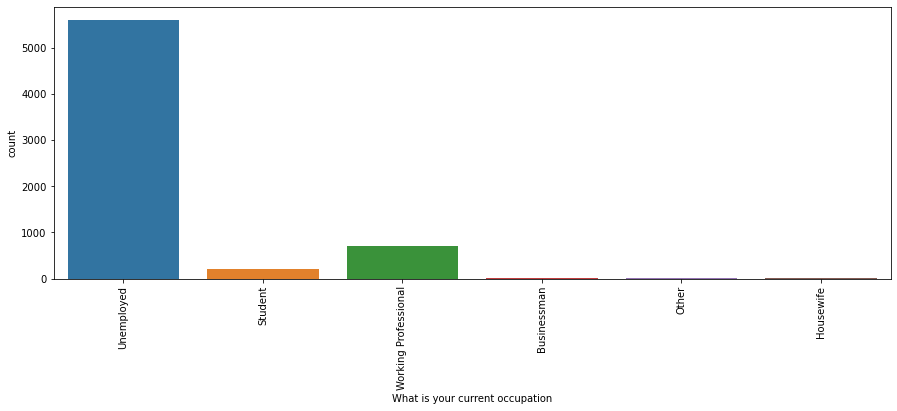

In [27]:
# Lets inspect the column value counts & impute the missing values for "What is your current occupation"

sub_categories_counts_plot('What is your current occupation')

In [28]:
# Replacing missing values with the most frequent sub-category

df_lead_raw['What is your current occupation'] = df_lead_raw['What is your current occupation'].fillna(
                                                            df_lead_raw['What is your current occupation'].mode()[0])

Value Counts for the column :  What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64


Count_Plot- What is your current occupation




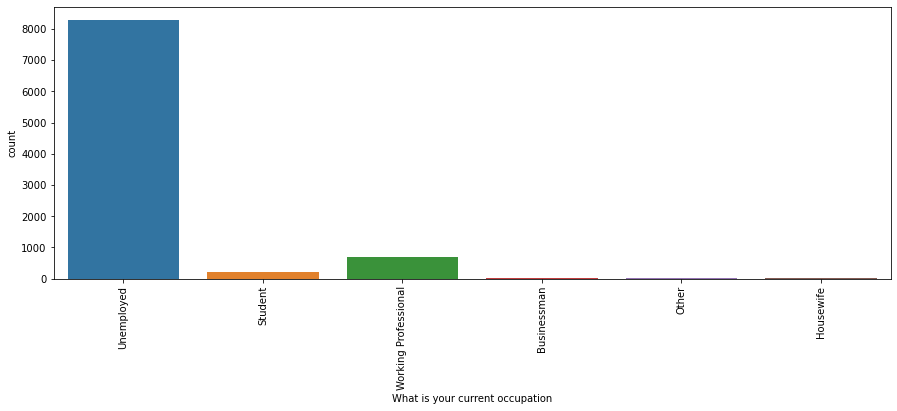

In [29]:
# Check the subcategories values counts after imputing the missing values

sub_categories_counts_plot('What is your current occupation')

Insights:
- Most of the leads are Unemployed, working Professionals.

#### Country

Value Counts for the column :  Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Germany                  0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Kuwait                   0.043290
Sweden                   0.032468
Bangladesh               0.021645
China                    0.021645
Belgium                  0.021645
Italy                    0.021645
Philippines              0.021645
Uganda                   0.021645
Ghana                    0.021645
Asia/Pacific Region      0.021645
Netherlan

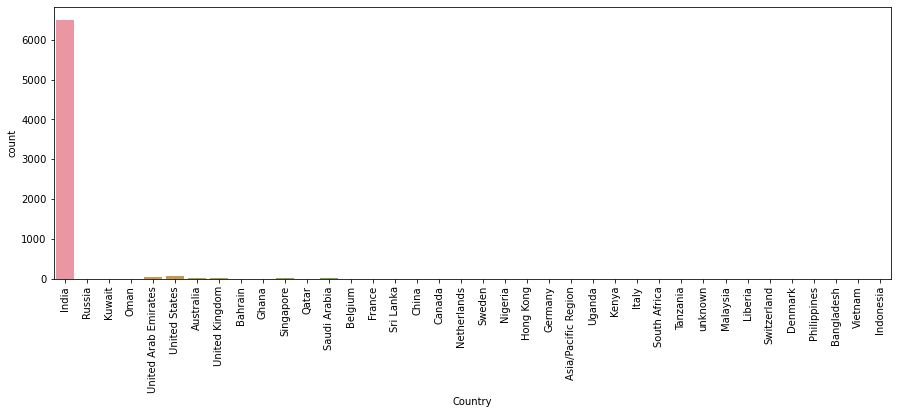

In [30]:
# Lets inspect the column value counts & impute the missing values for "Country"

sub_categories_counts_plot('Country')

In [31]:
# Lets impute missing values with the most frequent value " India"

df_lead_raw['Country'].fillna(df_lead_raw['Country'].mode()[0] , inplace = True)

Value Counts for the column :  Country
India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Canada                   0.043290
Kuwait                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
China                    0.021645
Philippines              0.021645
Ghana                    0.021645
Asia/Pacific Region      0.021645
Italy                    0.021645
Netherlands              0.021645
Bangladesh               0.021645
Uganda                   0.021645
Belgium                  0.021645
Indonesia

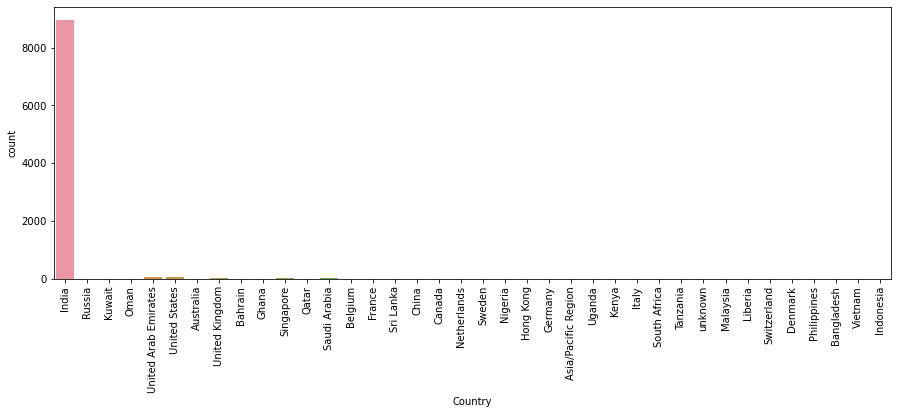

In [32]:
# Lets analyse the column 'Country' and impute the 'Nan' values

sub_categories_counts_plot('Country')

Insights:
- India seems to be the top as most of the Indians have opted for the course and hece its not much releavant for our mode building

In [33]:
# "Country" Column is highly Skewed Categorical Column, so We can drop this from our data set.  

skewed_cols.append('Country')

#### How did you hear about X Education

Value Counts for the column :  How did you hear about X Education
Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64


Count_Plot- How did you hear about X Education




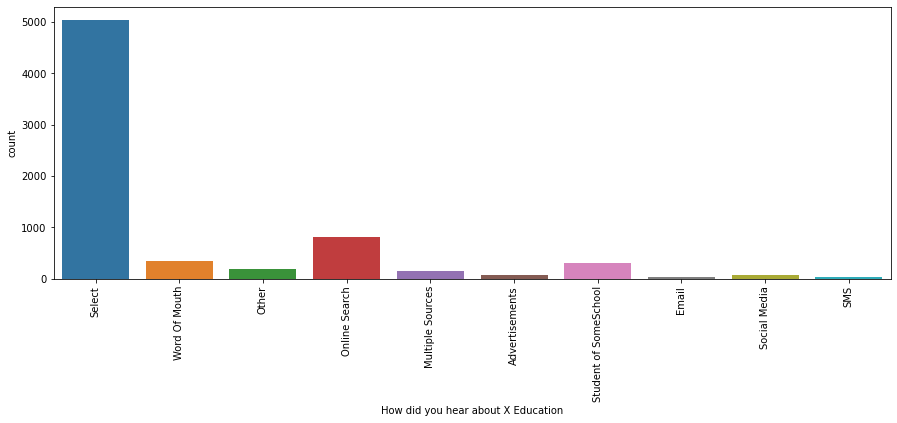

In [34]:
# Lets inspect the column value counts & impute the missing values for "How did you hear about X Education"

sub_categories_counts_plot('How did you hear about X Education')

Insights:
- Since 'Select' is susequent to NN or missing, we can drop this column as it is as high as 54% of missing data.

In [35]:
# Missing values in 'How did you hear about X Education' seems to be > 45% and this column is insignificant.
# we can drop the column as missing values is very high. We can append the column to the skewed_cols.

skewed_cols.append('How did you hear about X Education')

#### Specialization

Value Counts for the column :  Specialization
Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Speciali

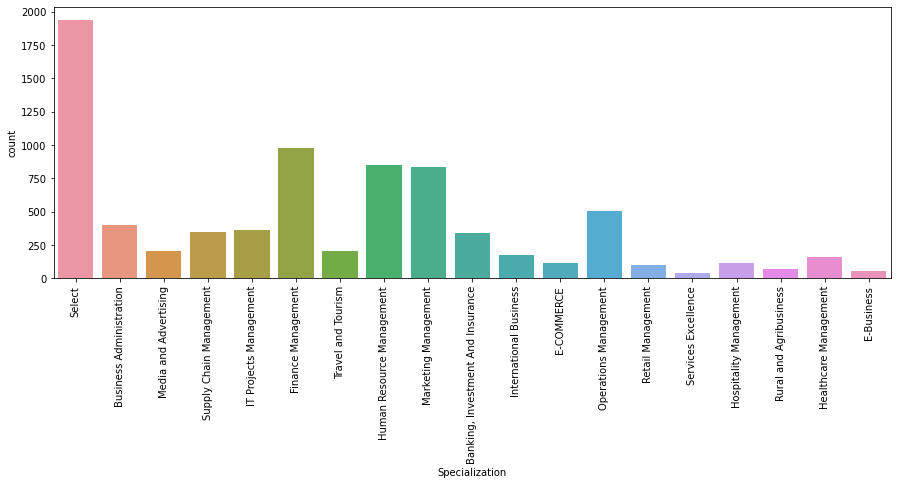

In [36]:
# Lets inspect the column value counts & impute the missing values for "Specialization

sub_categories_counts_plot('Specialization')

Insights:
- Specialization is the most important feature as the Education Companies main purpose is to provide trnnding courses.
- Most of the leads have not selected the Specialization,its important feature so lets not drop here.
- Missing values can be imputed with Select & in dummies creation we can drop this 'Select' feature.

In [37]:
# Replacing Nan with 'Select'

df_lead_raw['Specialization'].fillna(df_lead_raw['Specialization'].mode()[0] , inplace = True)

#### City

Value Counts for the column :  City
Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


Count_Plot- City




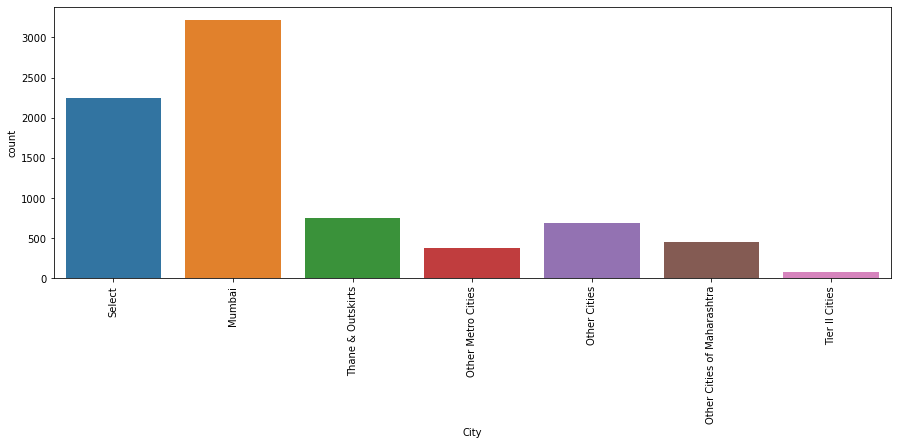

In [38]:
# Lets inspect the column value counts & impute the missing values for " City

sub_categories_counts_plot('City')

Insights:
- Most of the leads are from Mumbai, but most of the leads have not opted any city as their location is not available.
- Select' & 'Nan' are present (24.33 + 15.36 = 36.69).
- 'City' column should be dropped as 36.69% of the data is missing in this column.

In [39]:
# 'Select' & 'Nan' are present (24.33 + 15.36 = 36.69) .hence missing data becomes more than 5%, we can drop the column

# drop 'City' from our data set.  

skewed_cols.append('City')

#### Lets review the columns with missing values less the 5% and we can drop the corresponding rows

- TotalVisits
- Page Views Per Visit
- Last Activity
- Lead Source

#### TotalVisits

Value Counts for the column :  TotalVisits
0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
27.0      0.054113
25.0      0.054113
24.0      0.054113
22.0      0.032468
26.0      0.021645
29.0      0.021645
28.0      0.021645
115.0     0.010823
54.0      0.010823
43.0      0.010823
30.0      0.010823
32.0      0.010823
74.0      0.010823
251.0     0.010823
41.0      0.010823
141.0     0.010823
42.0      0.010823
55.0      0.010823
Name: TotalVisits, dtype: float64


Count_Plot- TotalVisits




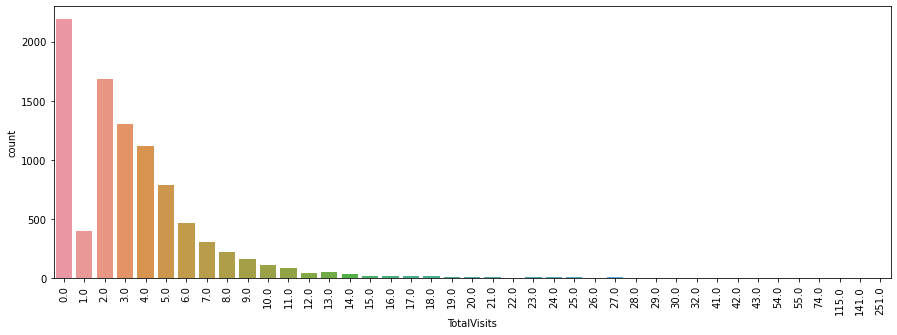

In [40]:
# Lets inspect the column value counts for "TotalVisits"

sub_categories_counts_plot('TotalVisits')

- Missing values are less than 2%, so we can drop the corresponding missing value rows.

#### Page Views Per Visit

Value Counts for the column :  Page Views Per Visit
0.00     23.690476
2.00     19.426407
3.00     12.943723
4.00      9.696970
1.00      7.045455
5.00      5.595238
1.50      3.311688
6.00      2.640693
2.50      2.608225
NaN       1.482684
7.00      1.439394
3.50      1.017316
8.00      0.930736
1.33      0.714286
1.67      0.649351
2.33      0.638528
2.67      0.584416
9.00      0.487013
4.50      0.465368
1.75      0.303030
3.33      0.292208
10.00     0.270563
1.25      0.248918
5.50      0.227273
2.25      0.205628
11.00     0.194805
3.67      0.173160
1.80      0.140693
6.50      0.140693
2.75      0.129870
1.40      0.119048
2.80      0.097403
2.20      0.097403
4.33      0.097403
14.00     0.097403
2.17      0.086580
1.60      0.086580
3.25      0.086580
2.40      0.064935
13.00     0.064935
12.00     0.054113
1.20      0.054113
15.00     0.043290
1.83      0.043290
2.60      0.043290
1.43      0.043290
1.71      0.043290
3.40      0.043290
1.38      0.032468
5.67      0.03246

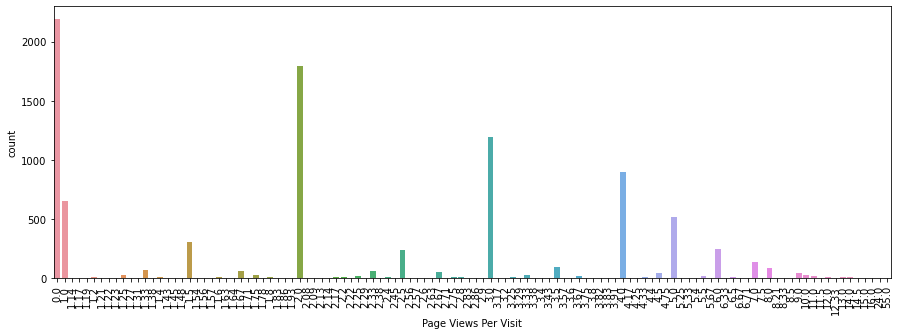

In [41]:
# Lets inspect the column value counts for "Page Views Per Visit"

sub_categories_counts_plot('Page Views Per Visit')

- Missing values are less than 2%, so we can drop the corresponding rows

#### Last Activity

Value Counts for the column :  Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64


Count_Plot- Last Activity




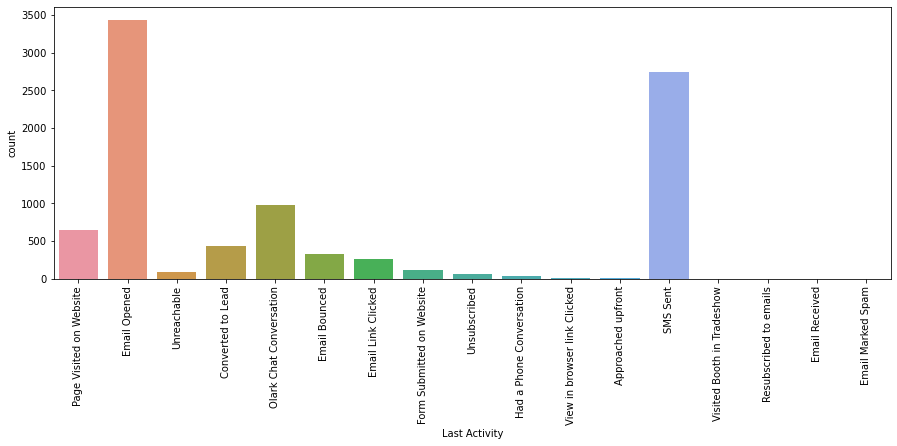

In [42]:
# Lets inspect the column value counts for "Last Activity"

sub_categories_counts_plot('Last Activity')

Insights:
- Most of the leads have opend their emails & SMS sent.
- Missing values are very less so we can drop the corresponding rows

#### Lead Source

Value Counts for the column :  Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
NC_EDM                0.010823
Pay per Click Ads     0.010823
blog                  0.010823
youtubechannel        0.010823
testone               0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
Name: Lead Source, dtype: float64


Count_Plot- Lead Source




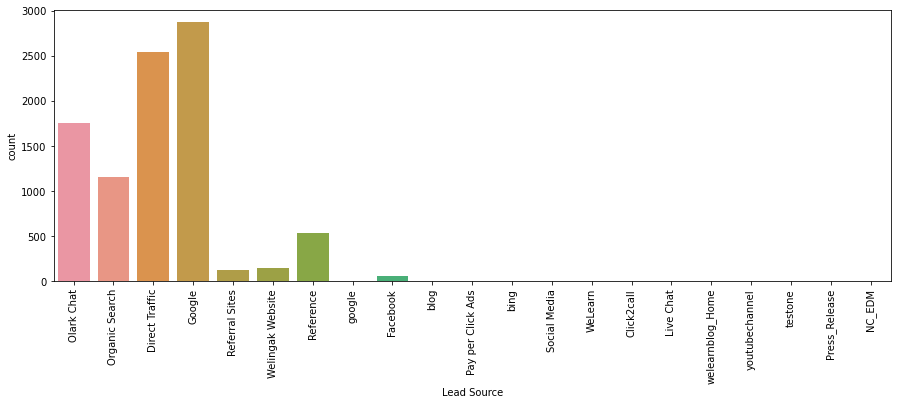

In [43]:
# Lets inspect the column value counts after imputations for "Lead Source"

sub_categories_counts_plot('Lead Source')

Insights:
- Google & Direct Traffic and Olark chat appears to be the top lead sources
- Missing values corresponding rows can be dropped as they are less than 2% of the data

In [44]:
# Replace 'google' with Google
df_lead_raw['Lead Source'].replace('google' , 'Google' , inplace = True)

Value Counts for the column :  Lead Source
Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
NC_EDM                0.010823
Pay per Click Ads     0.010823
youtubechannel        0.010823
blog                  0.010823
testone               0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
Name: Lead Source, dtype: float64


Count_Plot- Lead Source




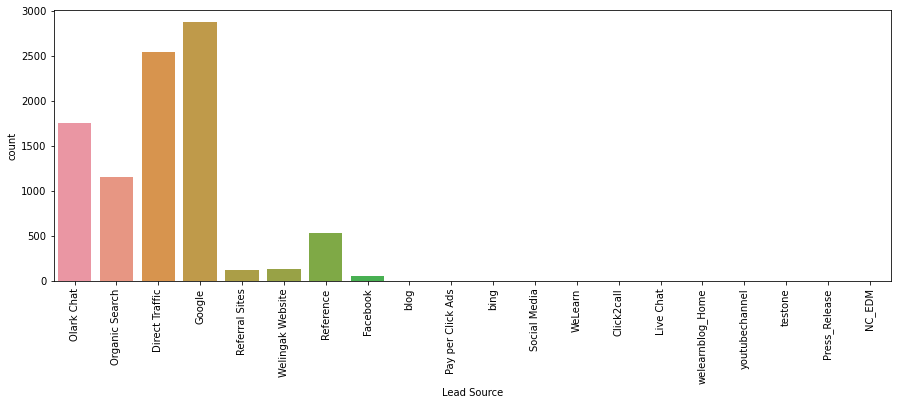

In [45]:
# Ploting Countplot for the "Lead Source" column

sub_categories_counts_plot('Lead Source')

Insight:
- Google appears to be th etop source for all the Hot leads conversion

#### Lets analyse the other Categorical Columns:

#### Lead Origin

Value Counts for the column :  Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64


Count_Plot- Lead Origin




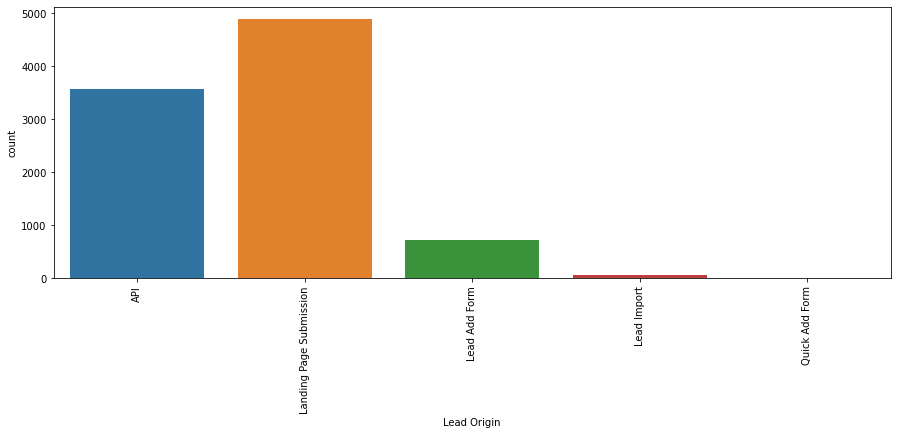

In [46]:
# Lets check the subcategory value counts & Countplot for the "Lead Source" column

sub_categories_counts_plot('Lead Origin')

Insights:
- Most leads have navigated till the "Landing page Submission" 

#### Do Not Email

Value Counts for the column :  Do Not Email
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64


Count_Plot- Do Not Email




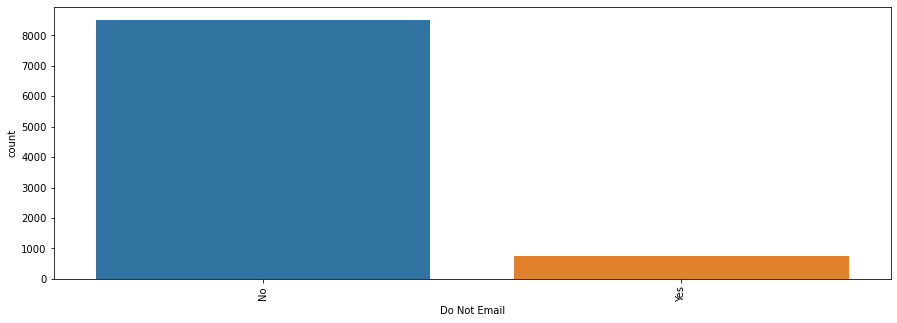

In [47]:
# Lets check the subcategory value counts & Countplot for the "Do Not Email" column

sub_categories_counts_plot('Do Not Email')

Insights:
- Almost 92% of the leads have opted 'No' in Do not Email.
- This column is skewed & can be dropped

In [48]:
# 'Do Not Email' column is highly skewed & we can drop the column
skewed_cols.append('Do Not Email')

#### Do Not Call

Value Counts for the column :  Do Not Call
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64


Count_Plot- Do Not Call




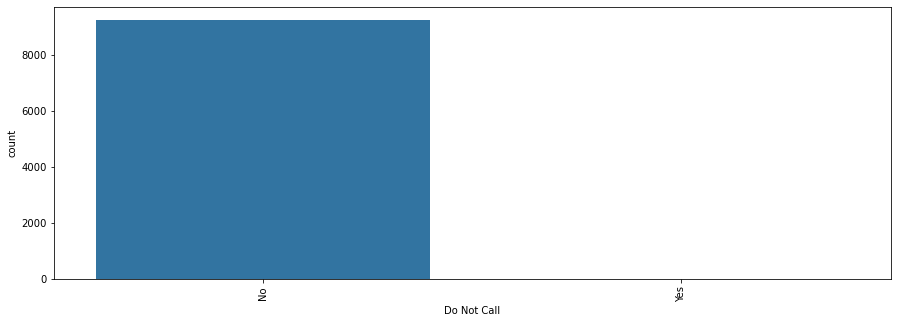

In [49]:
# Lets check the subcategory value counts & Countplot for the "Do Not Call" column

sub_categories_counts_plot('Do Not Call')

Insights:
- Most of the leads have opted 'No' in "Do Not Call"
- This is is higly skewed & can be dropped

In [50]:
# 'Do Not Call' column is highly skewed & we can drop the column
skewed_cols.append('Do Not Call')

#### Last Notable Activity

Value Counts for the column :  Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Email Received                   0.010823
Form Submitted on Website        0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64


Count_Plot- Last Notable Activity




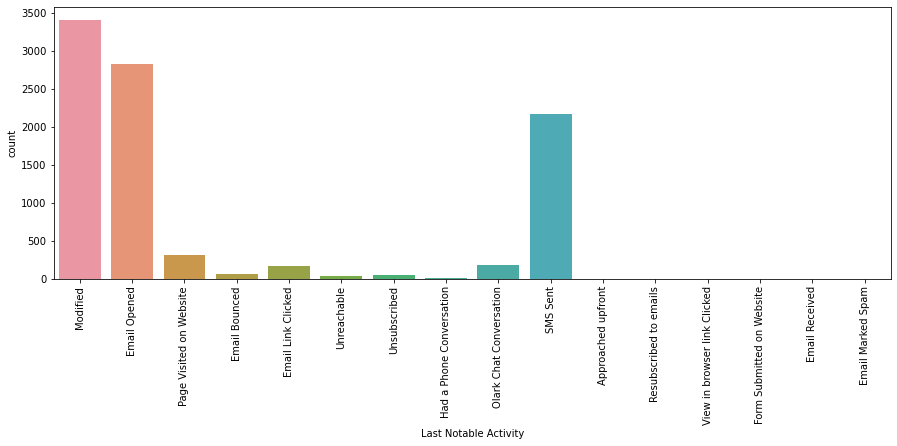

In [51]:
# Lets check the subcategory value counts & Countplot for the "Last Notable Activity" column

sub_categories_counts_plot('Last Notable Activity')

Insights:
- Most of the leads last notable activity is "Modified" , "Email Opened" and "SMS Sent".

#### A free copy of Mastering The Interview

Value Counts for the column :  A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64


Count_Plot- A free copy of Mastering The Interview




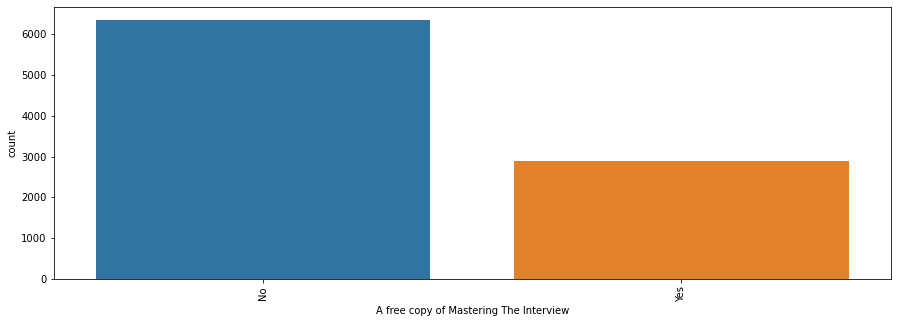

In [52]:
# Lets check the subcategory value counts & Countplot for the "A free copy of Mastering The Interview" column

sub_categories_counts_plot('A free copy of Mastering The Interview')

Insight:
- Most of the leads have not opted 'No' for "A free copy Mastering the Interview

#### Search

Value Counts for the column :  Search
No     99.848485
Yes     0.151515
Name: Search, dtype: float64


Count_Plot- Search




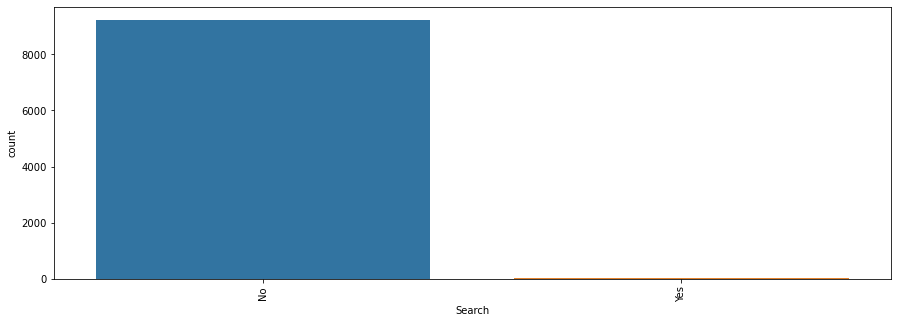

In [53]:
# Lets check the subcategory value counts & Countplot for the "Search" column

sub_categories_counts_plot('Search')

Insights:
- Most of the leads have not searched for the education Company add.
- This column is highly skewed and can be dropped.

In [54]:
# 'Search' column is highly skewed & we can drop the column
skewed_cols.append('Search')

#### Magazine

Value Counts for the column :  Magazine
No    100.0
Name: Magazine, dtype: float64


Count_Plot- Magazine




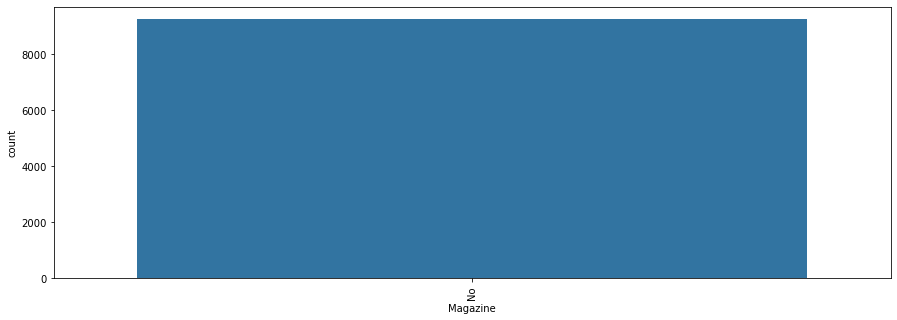

In [55]:
# Lets check the subcategory value counts & Countplot for the "Magazine" column

sub_categories_counts_plot('Magazine')

Insights:
- Most of the leads have not searcehd for the Education Company add in Magazine
- This column is highly skewed and can be dropped

In [56]:
# 'Magazine' column is highly skewed & we can drop the column
skewed_cols.append('Magazine')

#### Newspaper Article

Value Counts for the column :  Newspaper Article
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64


Count_Plot- Newspaper Article




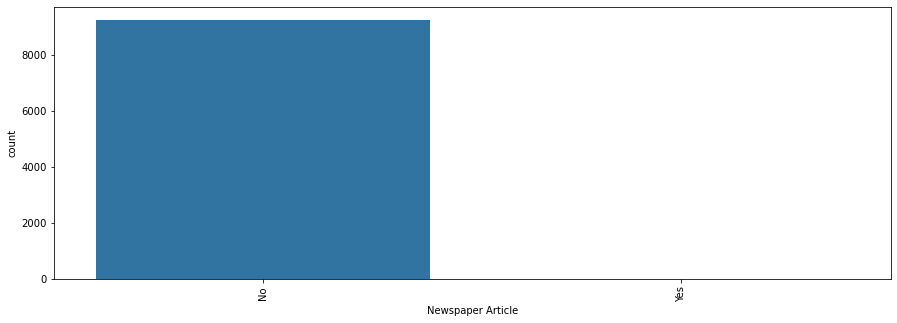

In [57]:
# Lets check the subcategory value counts & Countplot for the "Newspaper Article" column

sub_categories_counts_plot('Newspaper Article')

Insighs:
- Most of the leads have not searcehd for the Education Company add in Newspaper Article.
- This column is highly skewed and can be dropped

In [58]:
# 'Newspaper Article' column is highly skewed & we can drop the column
skewed_cols.append('Newspaper Article')

#### X Education Forums

Value Counts for the column :  X Education Forums
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64


Count_Plot- X Education Forums




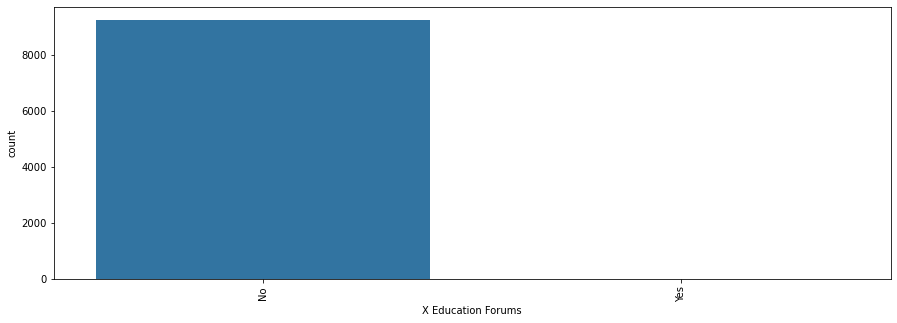

In [59]:
# Lets check the subcategory value counts & Countplot for the "X Education Forums" column

sub_categories_counts_plot('X Education Forums')

Insighs:

- Most of the leads have not searcehd for the Education Company add in any X Education Forums
- This column is highly skewed and can be dropped

In [60]:
# 'X Education Forums' column is highly skewed & we can drop the column
skewed_cols.append('X Education Forums')

#### Newspaper

Value Counts for the column :  Newspaper
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64


Count_Plot- Newspaper




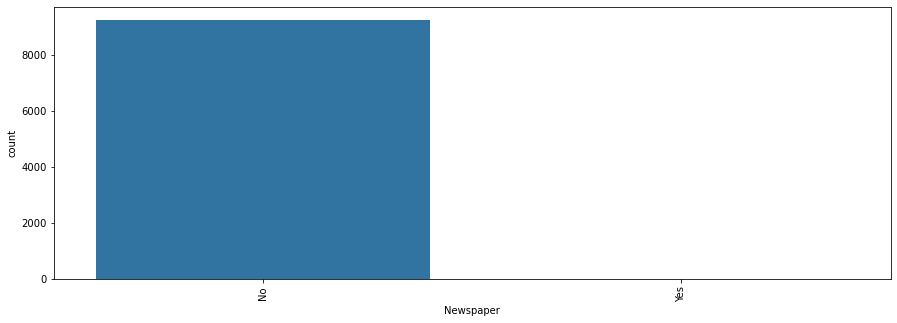

In [61]:
# Lets check the subcategory value counts & Countplot for the "Newspaper" column

sub_categories_counts_plot('Newspaper')

Insighs:

- Most of the leads have not searcehd for the Education Company add in any Newspaper.
- This column is highly skewed and can be dropped

In [62]:
# 'Newspaper' column is highly skewed & we can drop the column
skewed_cols.append('Newspaper')

#### Digital Advertisement

Value Counts for the column :  Digital Advertisement
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64


Count_Plot- Digital Advertisement




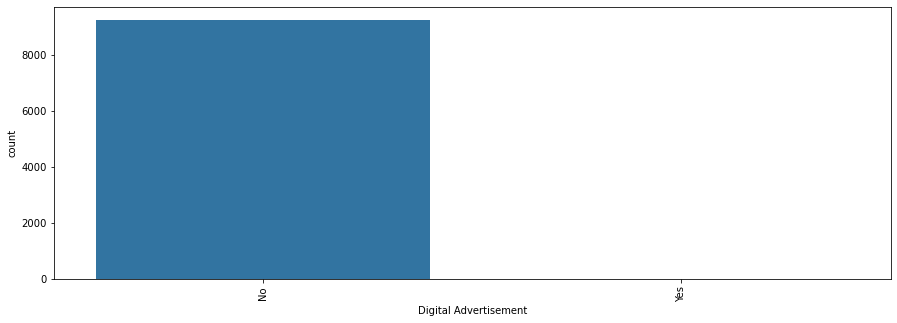

In [63]:
# Lets check the subcategory value counts & Countplot for the "Digital Advertisement" column

sub_categories_counts_plot('Digital Advertisement')

Insighs:

- Most of the leads have not searcehd for the Education Company add in any Digital Advertisement.
- This column is highly skewed and can be dropped

In [64]:
# 'Digital Advertisemen' column is highly skewed & we can drop the column
skewed_cols.append('Digital Advertisement')

#### Through Recommendations

Value Counts for the column :  Through Recommendations
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64


Count_Plot- Through Recommendations




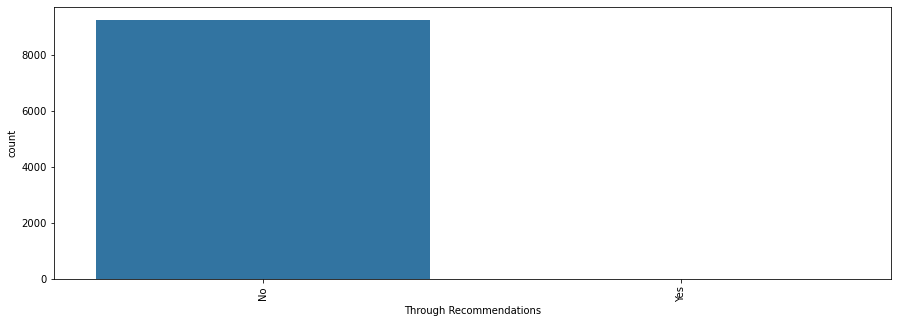

In [65]:
# Lets check the subcategory value counts & Countplot for the "Through Recommendations" column

sub_categories_counts_plot('Through Recommendations')

Insights:
- Most of the leads have not come through any recomendations.
- This column is highly skewed and can be dropped

In [66]:
# 'Through Recommendations' column is highly skewed & we can drop the column
skewed_cols.append('Through Recommendations')

#### Receive More Updates About Our Courses

Value Counts for the column :  Receive More Updates About Our Courses
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64


Count_Plot- Receive More Updates About Our Courses




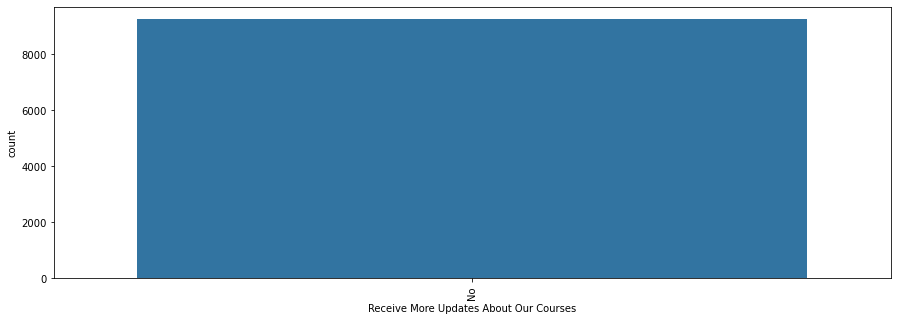

In [67]:
# Lets check the subcategory value counts & Countplot for the "Receive More Updates About Our Courses" column

sub_categories_counts_plot('Receive More Updates About Our Courses')

Insights:

- Most of the leads have not opted to 'receive more updates about our courses'.
- This column is highly skewed and can be dropped

In [68]:
# 'Receive More Updates About Our Courses' column is highly skewed & we can drop the column
skewed_cols.append('Receive More Updates About Our Courses')

#### Get updates on DM Content

Value Counts for the column :  Get updates on DM Content
No    100.0
Name: Get updates on DM Content, dtype: float64


Count_Plot- Get updates on DM Content




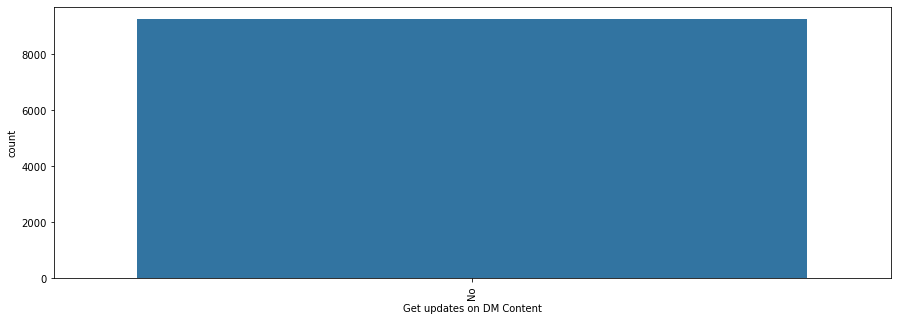

In [69]:
# Lets check the subcategory value counts & Countplot for the "Get updates on DM Contentt" column

sub_categories_counts_plot('Get updates on DM Content')

Insights:

- Most of the leads have opted not to "Get updates on the DM Content"
- This column is highly skewed and can be dropped

In [70]:
# 'Get updates on DM Content' column is highly skewed & we can drop the column
skewed_cols.append('Get updates on DM Content')

#### Update me on Supply Chain Content

Value Counts for the column :  Update me on Supply Chain Content
No    100.0
Name: Update me on Supply Chain Content, dtype: float64


Count_Plot- Update me on Supply Chain Content




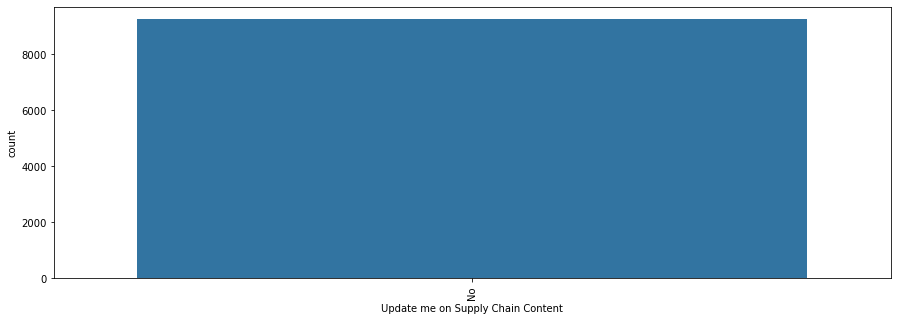

In [71]:
# Lets check the subcategory value counts & Countplot for the "Update me on Supply Chain Content" column

sub_categories_counts_plot('Update me on Supply Chain Content')

Insights:

- Most of the leads have opted not to "Update me on Supply chain Content"
- This column is highly skewed and can be dropped

In [72]:
# 'Update me on Supply Chain Contents' column is highly skewed & we can drop the column
skewed_cols.append('Update me on Supply Chain Content')

#### I agree to pay the amount through cheque

Value Counts for the column :  I agree to pay the amount through cheque
No    100.0
Name: I agree to pay the amount through cheque, dtype: float64


Count_Plot- I agree to pay the amount through cheque




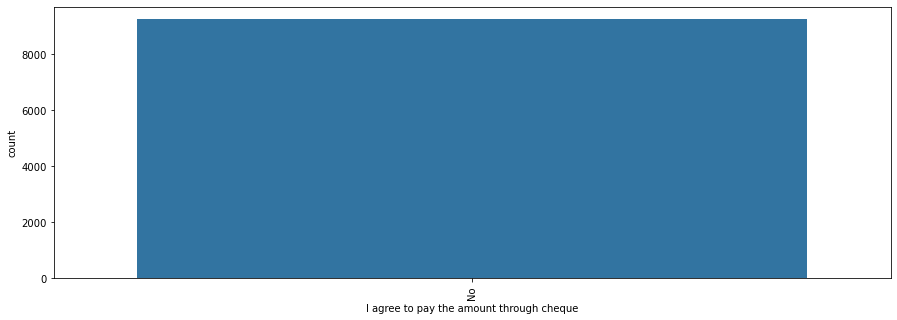

In [73]:
# Lets check the subcategory value counts & Countplot for the "I agree to pay the amount through cheque" column

sub_categories_counts_plot('I agree to pay the amount through cheque')

Insights:

- Most of the leads have opted not to "I agree to pay the amount through cheque"
- This column is highly skewed and can be dropped

In [74]:
# 'I agree to pay the amount through cheque' column is highly skewed & we can drop the column
skewed_cols.append('I agree to pay the amount through cheque')

### Lets drop the Skewed columns

In [75]:
# Lets look at the columns we are dropping

print(skewed_cols)

['Prospect ID', 'Lead Number', 'What matters most to you in choosing a course', 'Lead Profile', 'Country', 'How did you hear about X Education', 'City', 'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'I agree to pay the amount through cheque']


In [76]:
# Dropping the highly skewed columns
df_lead_raw.drop(skewed_cols, axis = 1, inplace = True)

In [77]:
# Cross Checkiing if the there exists any missing values
df_lead_raw.isnull().sum()/len(df_lead_raw.index) * 100

Lead Origin                               0.000000
Lead Source                               0.389610
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Specialization                            0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

### Lets drop the rows correspnding to the columns with missing values < 5%

In [78]:
# Dropping the rows for the missing values in columns less than 5%
df_lead_raw.dropna(axis = 0, inplace = True)

In [79]:
# Cross Checkiing if the there exists any missing values
df_lead_raw.isnull().sum()/len(df_lead_raw.index) * 100

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [80]:
df_lead_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Last Notable Activity                   9074 non-null   obje

### Outliers Handling

In [81]:
# Lets check the numeric columns
df_lead_raw.select_dtypes('number').columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [82]:
# Checking for Outliers in Continuous variables
df_lead_continuos = df_lead_raw[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]

In [83]:
# Checking for Outliers at 1 % ,5% ,25% , 50% , 75% , 95% & 99%
df_lead_continuos.describe(percentiles = [0.01 ,0.05 , 0.25 ,0.5 ,0.75 ,0.95 ,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
TotalVisits,9074.0,3.456028,4.858802,0.0,0.0,0.0,1.0,3.0,5.00,10.0,17.0,251.0
Total Time Spent on Website,9074.0,482.887481,545.256560,0.0,0.0,0.0,11.0,246.0,922.75,1557.0,1839.0,2272.0
Page Views Per Visit,9074.0,2.370151,2.160871,0.0,0.0,0.0,1.0,2.0,3.20,6.0,9.0,55.0


#### Oultiers are presnt above 99 percentile , but later in data Transformation, we will apply StanderScaler and it will handle the outliers.

In [84]:
# Creating a box plot to check outliers

def univariate_box_plot(col_name):
    print(col_name ,"- Boxplot")
    plt.figure(figsize = (15,5))
    sns.boxplot(df_lead_raw[col_name] ) 
    plt.show()

#### TotalVisits

TotalVisits - Boxplot


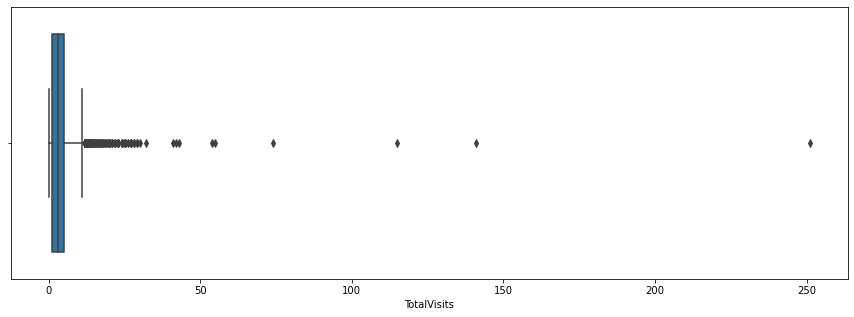

In [85]:
# Lets plot a box plot and check for Outliers in 'TotalVisits' column

univariate_box_plot('TotalVisits')

- Many data points are present above 99th Quantile and can be considered as Outliers but here we are not deleting as Standars Scaler will handle them in Data Transformation

#### Total Time Spent on Website

Total Time Spent on Website - Boxplot


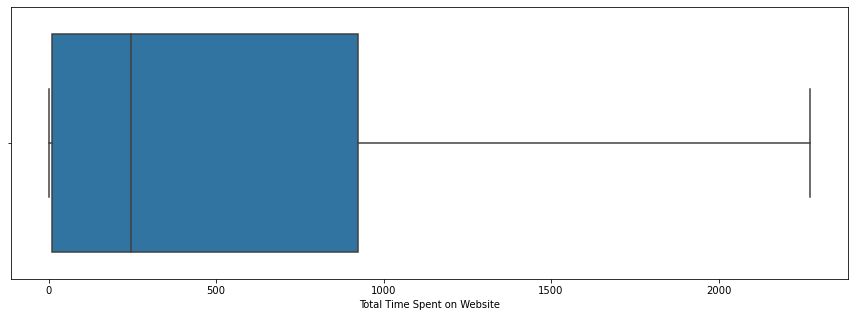

In [86]:
# Lets plot a box plot and check for Outliers in 'Total Time Spent on Website' column

univariate_box_plot('Total Time Spent on Website')

-  No Oultiers found so no capping required.

#### Page Views Per Visit

Page Views Per Visit - Boxplot


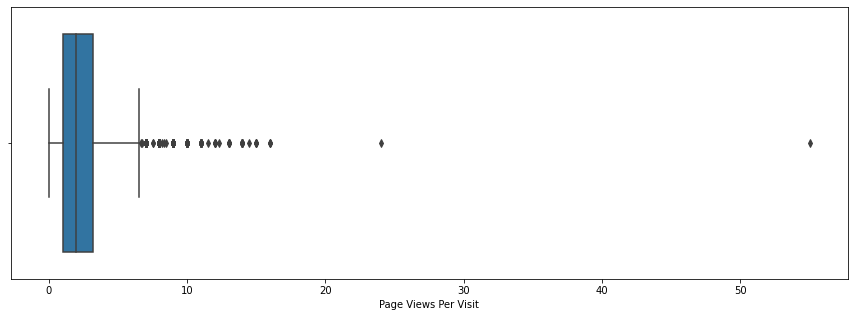

In [87]:
# Lets plot a box plot and check for Outliers in 'Page Views Per Visit' column

univariate_box_plot('Page Views Per Visit')

- Many data points are present above 99th Quantile and can be considered as Outliers but here we are not deleting as Standars Scaler will handle them in Data Transformation

In [88]:
# Conversion Rate for past orders - Checking the balace of the Target variable

round(len(df_lead_raw[df_lead_raw['Converted']==1].index)/len(df_lead_raw.index)*100,2)

37.86

###  Grouping the Column based on the Data Type to perform Analysis 

In [89]:
# Let us Group the Variables to Perform EDA 

# Making list of numerical columns from Analysis point of view

numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

In [90]:
# Making list of categorical columns from Analysis point of view

categorical_column = df_lead_raw.select_dtypes('object').columns

In [91]:
print(categorical_column)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [92]:
# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [93]:
# Lets check the unique subcategories in each categorical variable
df_lead_raw[list(categorical_column)].describe()

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074
unique,4,20,17,19,6,2,16
top,Landing Page Submission,Google,Email Opened,Select,Unemployed,No,Modified
freq,4885,2873,3432,3282,8159,6186,3267


###  Creating a functions to plot Graph for Univariate &  Bivariate analysis

In [94]:
# Function to plot Nummerical Univariate Graph 
def numerical_univariate_graph(num_data):
    plt.style.use('ggplot')
    plt.figure(figsize = (8,6))
    ax = sns.distplot(df_lead_raw[num_data])
    plt.show()

In [95]:
# Function to plot Categorical_categorical Bivariate Graph
def categorical_univariate_graph(cat_data):
    plt.style.use('ggplot')
    plt.figure(figsize = (15,5))
    sns.countplot(df_lead_raw[cat_data] , hue = df_lead_raw['Converted'] )
    plt.xticks(rotation = 90)
    plt.show()

In [96]:
# Function to plot Numerical Bivariate Graph
def numerical_bivariate_graph(num_data1):
    plt.style.use('ggplot')
    plt.figure(figsize = (8, 8))
    sns.regplot(x = num_data1, y = 'Converted', data = df_lead_raw )
    plt.show()

# 3. Data Analysis (EDA)

### Univariate - Continuous variables Analysis 

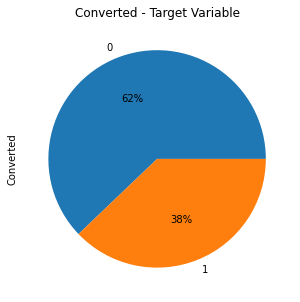

In [97]:
# Lets plot a pie chart for the 'Converted'- Target variable'
plt.figure(figsize = (8,5))
df_lead_raw['Converted'].value_counts().plot.pie(autopct = '%.0f%%')
plt.title("Converted - Target Variable")
plt.show()

#### Observation:
- Target variable is not balanced only 38% Hot leads & 62% Cold Leads

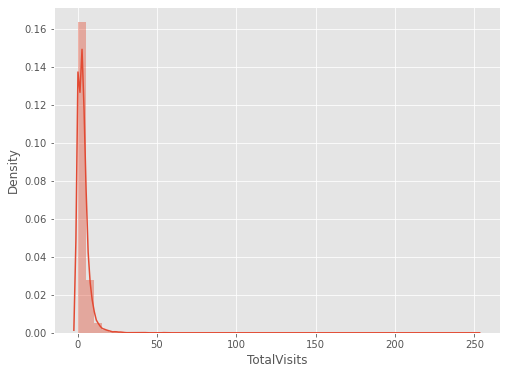

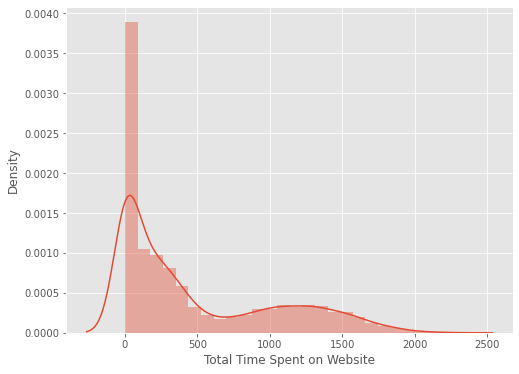

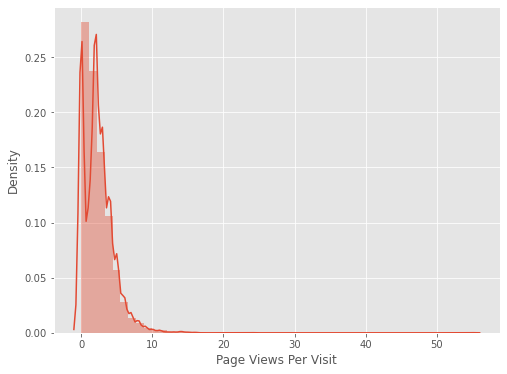

In [98]:
# Plotting distplot for the Continous variables

for num_col in numerical_column:
    numerical_univariate_graph(num_col)
    

#### Inferences:
1. Total Visists appears to be bimodal distributed & right skewed.
2. Time spent on Website appears to be bimodal distributed also right skewed.
3. Page views per visit appears to be multimodal distributed & right skewed 

### Univariate - Categorical Analysis

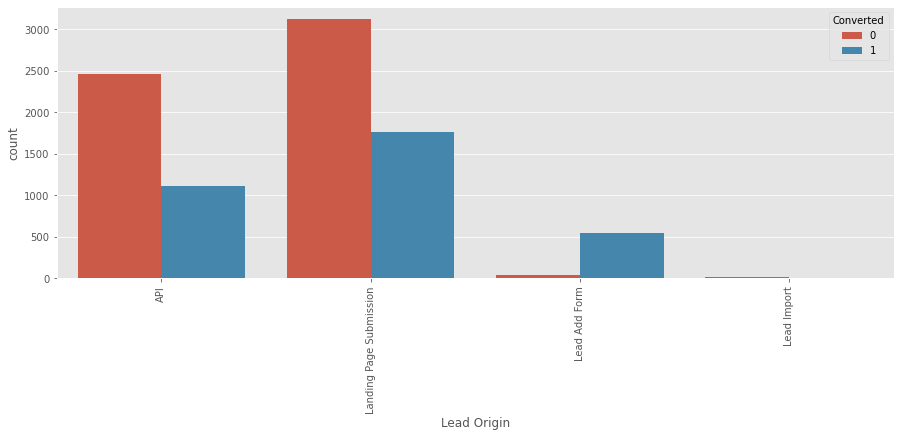

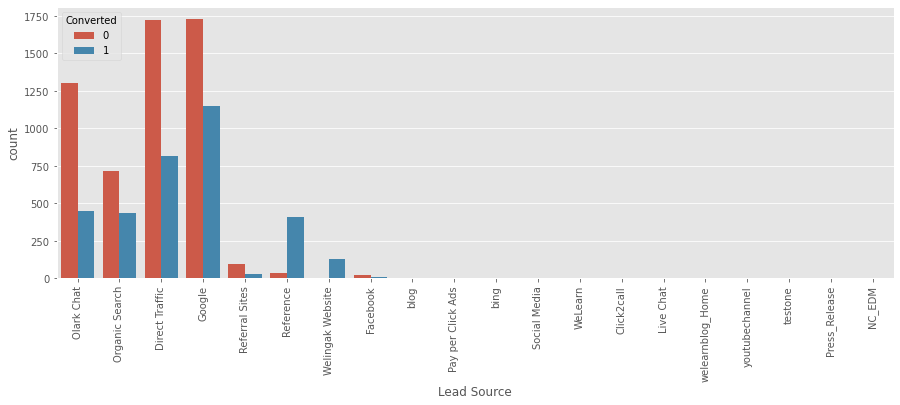

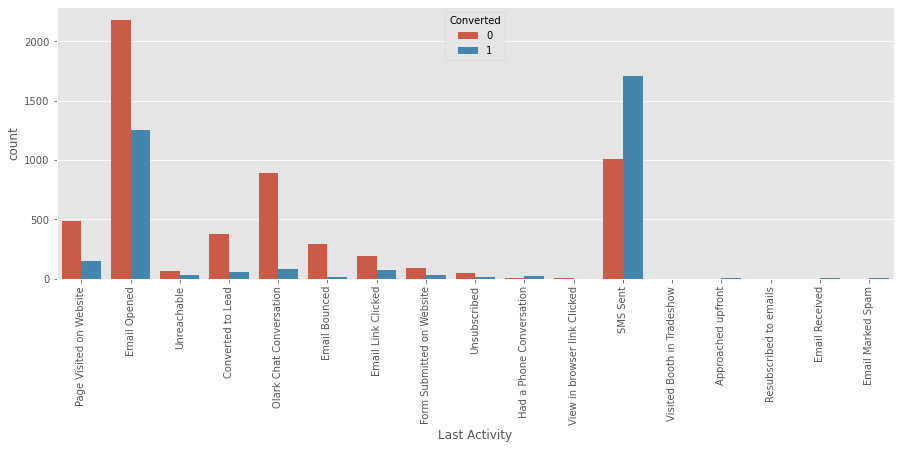

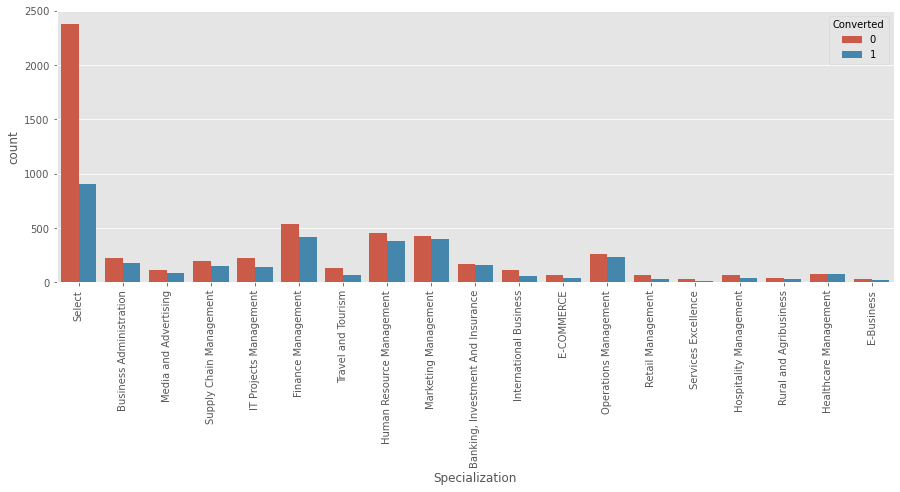

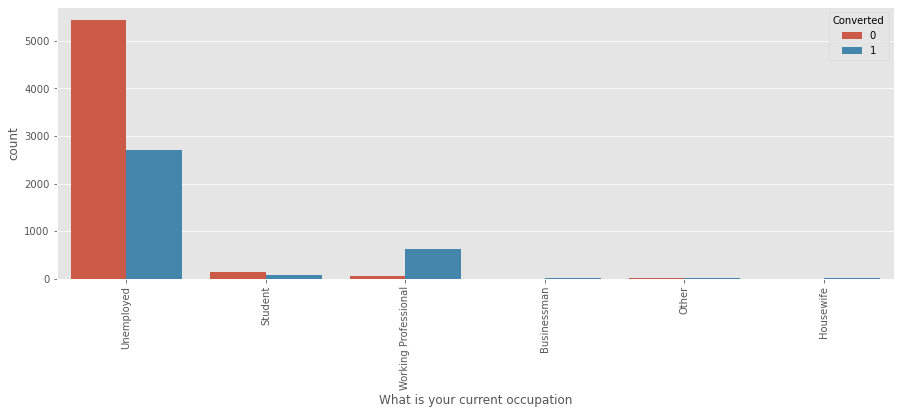

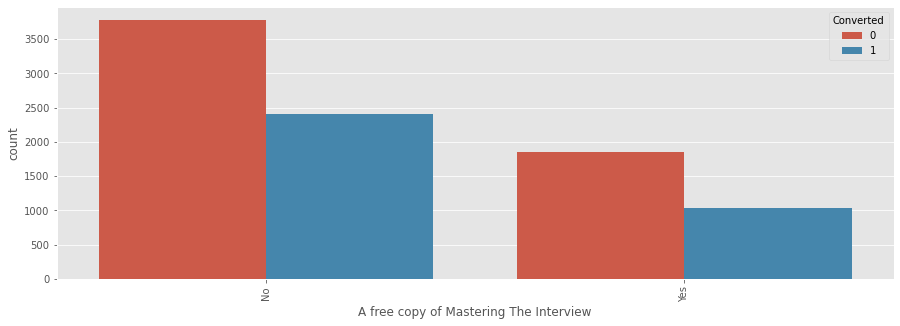

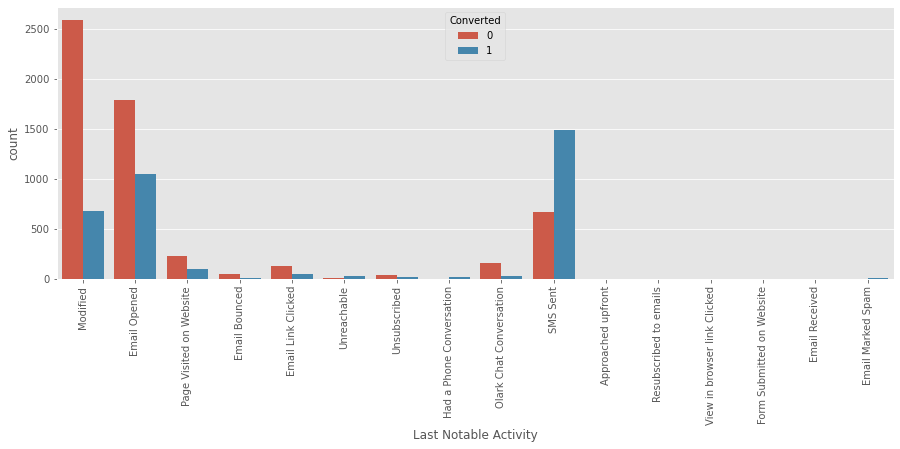

In [99]:
# Univariate Analysis of Numerical Columns
for cat_col in categorical_column:
    categorical_univariate_graph(cat_col)

#### Insights:
- Most of the Leads who have converted to Hot Leads are observed high in the below variables,
    1. Lead Origin - Landing Page Submission , API, Lead Add Form
    2. Lead Search - Google ,Direct Traffic, Organic Search & Olark Chat
    3. Last Activity - SMS Sent , Email Opened
    4. Specialization - Finance Management , Human resources Management & Banking.
    5. What is your current Occupation - Unemployed
    6. A free copy of Mastering The Interview - No
    7. Last Notable Activity - SMS Sent , Email Opened & Modified

## Bivariate  Analysis

### Continuous - Continuous Variable

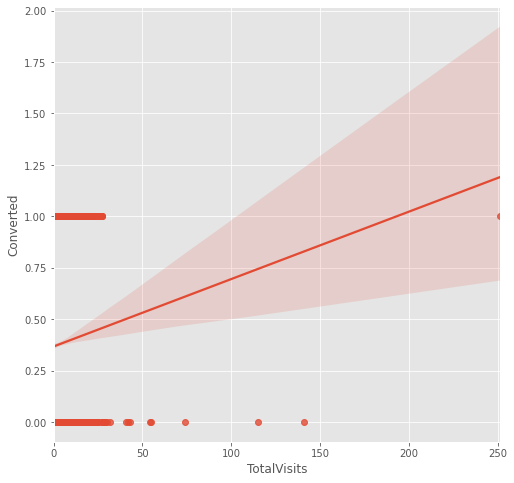

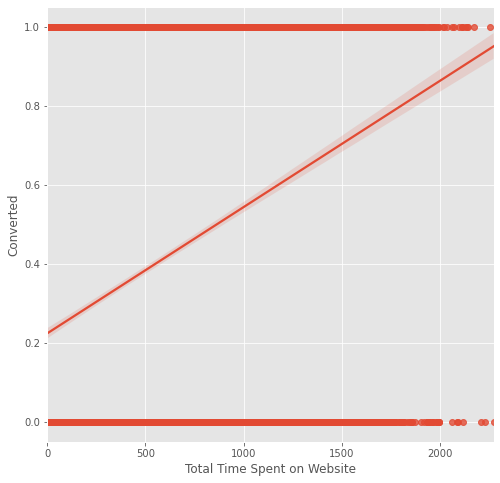

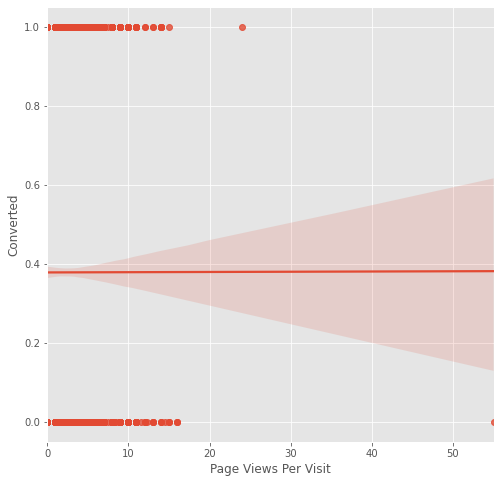

In [100]:
# Bivariate Analysis of Numerical Columns
for num_col in numerical_column:
    numerical_bivariate_graph(num_col)

#### Insights:
- Most of the leads with high "Total Time Spent on Website" and who have high"TotalVisits" have converted to Hot Leads.

## Multivariate Analysis

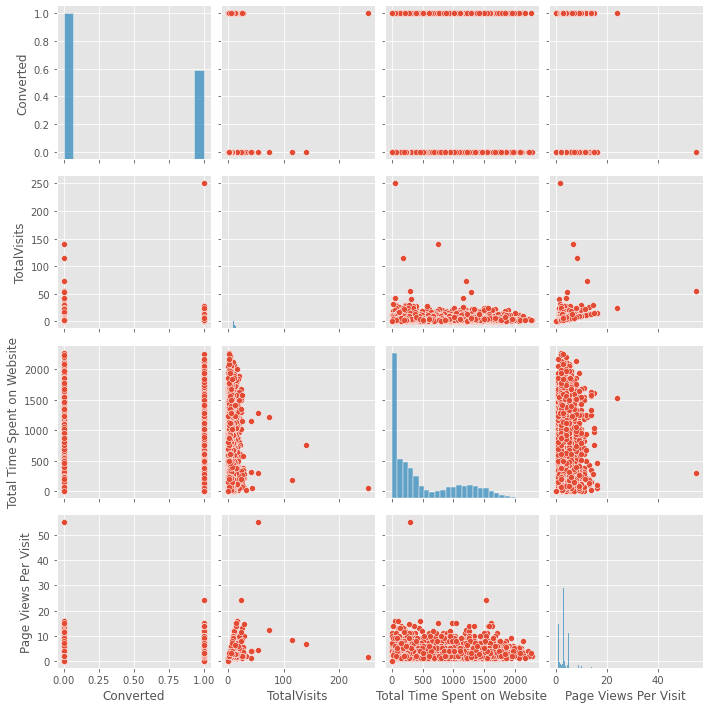

In [101]:
# Lets plot pairplot for all the continuous variables

sns.pairplot(df_lead_raw)
plt.show()

Insights:
- There is low linear relationship between TotalVisits & PPaage views Per Visit.
- There is no pattern observed, data points are clustered.

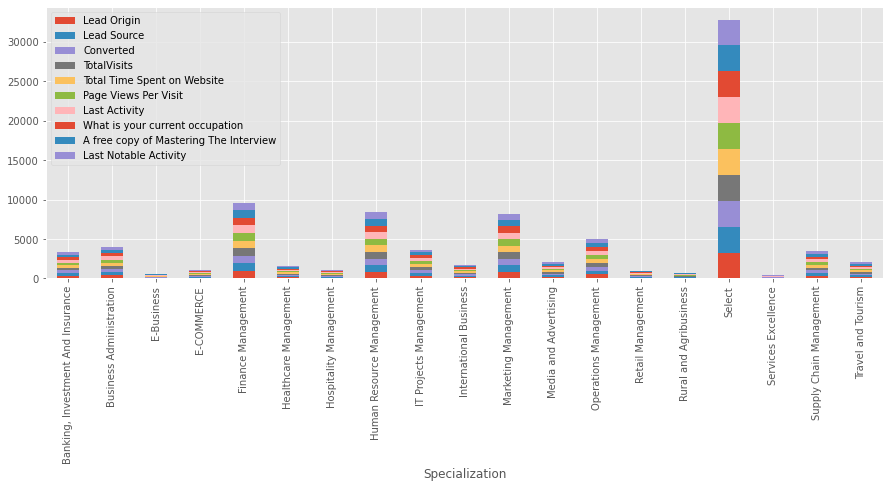

In [102]:
# Lets plot a stacked bar plot for categorical column - "Specialization"

df_lead_raw.groupby(['Specialization']).count().plot.bar(stacked = True , figsize = (15,5))
plt.show()

Insights:
- Most of the leads got converted to Hot leads in 'Select', FInance Management' & HR Management

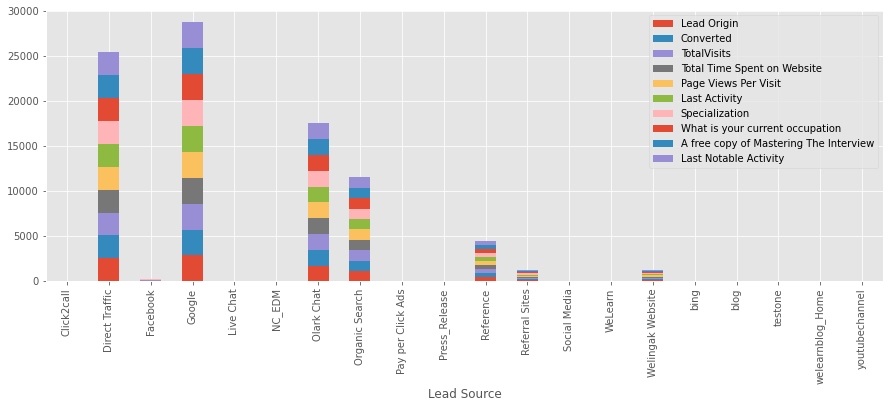

In [103]:
# Lets plot a stacked bar plot for categorical column - "Lead Source"

df_lead_raw.groupby(['Lead Source']).count().plot.bar(stacked = True , figsize = (15,5))
plt.show()

Insights:
- Google seem to be the top with the highest Hot Lead conversion.
- Direct Traffic and Olark chat has the next highest Hot leads conversion


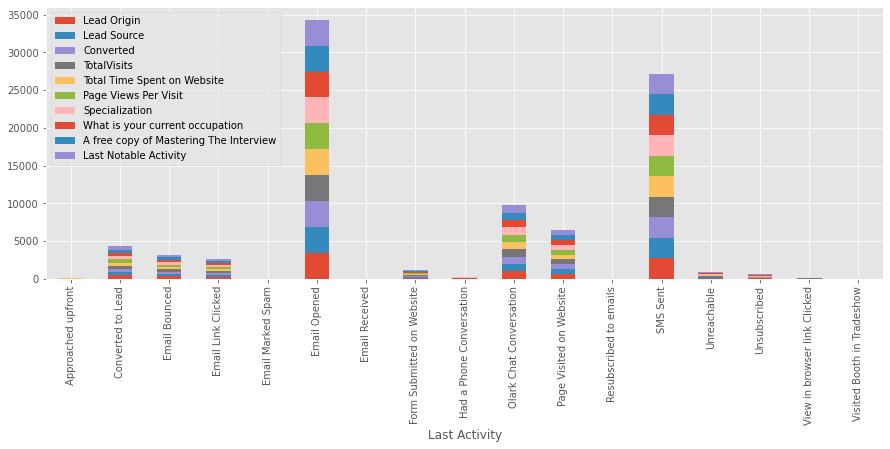

In [104]:
# Lets plot a stacked bar plot for categorical column - "Last Activity"

df_lead_raw.groupby(['Last Activity']).count().plot.bar(stacked = True , figsize = (15,5))
plt.show()

Insightts:
- Most of Hots Leads  have opened email, SMS Sent & Olark Chat Conversation.

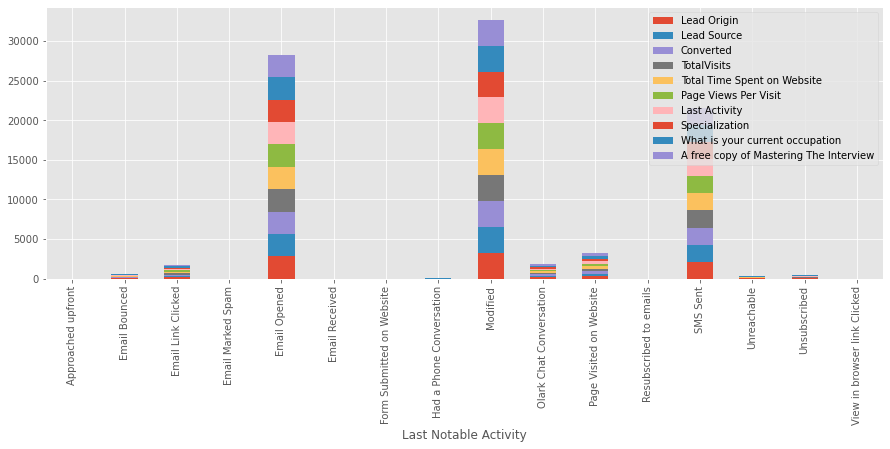

In [105]:
# Lets plot a stacked bar plot for categorical column - "Last Activity"

df_lead_raw.groupby(['Last Notable Activity']).count().plot.bar(stacked = True , figsize = (15,5))
plt.show()

Insights:
- Last notable activity tracked is on Modified, Last Notable Acitivity and SMS Sent 

## Lets check the Correlation Matrix

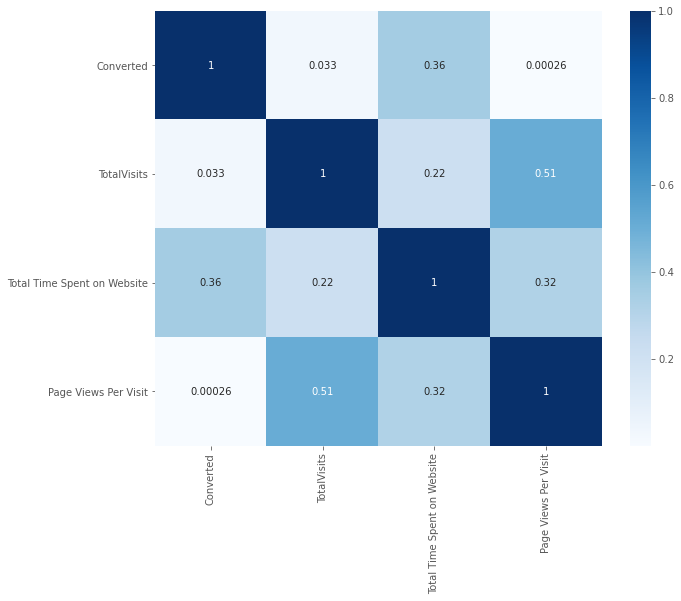

In [106]:
# Lets plot Heat map to understadn if any features are highly correlated
plt.figure(figsize = (10,8))
sns.heatmap(df_lead_raw.corr() , annot = True , cmap = 'Blues')
plt.show()

#### Observations
- 1. Heat map shows that the variables in relationship with the Target variable 'Converted'.
- 2. 'Pages views per Visit' has negative relationship with the 'Converted' target variable.
- 3. No collinearity observed between the variables.

# 4. Data Preparation

### Binary Variables Encoding

In [107]:
# Lets check the Binary variables in the data set
df_lead_raw.nunique()

Lead Origin                                  4
Lead Source                                 20
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
Specialization                              19
What is your current occupation              6
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

"A free copy of Mastering The Interview" is the only binary column with Yes/No other than the 'Converted' Column

In [108]:
# From the above Dataframe, lets convert "A free copy of Mastering The Interview" with Yes/No to 1/0

binary_col = ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead_raw[binary_col] = df_lead_raw[binary_col].apply(binary_map)

In [109]:
# Lets check the first 5 rows of the dataset
df_lead_raw.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


### Creating Dummy Variables Encoding

In [110]:
#  Let us create the Dummies  from the df_lead_raw dataframe and Drop the Columns (Categorical)

In [111]:
#  List the Dummy variables
columns_to_dummies = df_lead_raw.select_dtypes('object').columns
columns_to_dummies

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [112]:
# Lets consider all columns except 'Specialization' and create dummies for the rest.

columns_to_dummies = columns_to_dummies.drop('Specialization')
columns_to_dummies

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [113]:
# - We created a Dummy Dataframe into a New Dataframe called new_lead_model-  
#so that we can re-use the Raw dataframe if required

dummy_leads = pd.get_dummies(df_lead_raw[columns_to_dummies] , drop_first = True)

# Concatenating the dummy leads & the Raw dataframe into a New Dataframe called new_lead_model
new_lead_model = pd.concat([df_lead_raw,dummy_leads],  axis = 1)

In [114]:
# Lets drop the categorical columns for which dummy variables which we created now

new_lead_model.drop( columns_to_dummies , axis = 1, inplace = True )

In [115]:
# LEts do dummy creation for 'Specialization'

special_dummies = pd.get_dummies(df_lead_raw['Specialization'] , prefix = 'Specialization')

In [116]:
# Lets drop 'Specialization_Select' column from the special_dummies
special_dummies.drop(['Specialization_Select'] , axis = 1 ,inplace = True)

# Lets check the head of the special_dummies
special_dummies.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
# Lets concat the special dummmies to the 'new_lead_model'
new_lead_model = pd.concat([new_lead_model, special_dummies],  axis = 1)

In [118]:
# Lets drop the Specialization' column from the new_lead_model
new_lead_model.drop(['Specialization'] , axis = 1 ,  inplace = True)

In [119]:
# Lets check the top  rows of the new_lead_model

new_lead_model.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
# Lets check the shape of the new_lead_model

new_lead_model.shape

(9074, 81)

In [121]:
# Lets check the information of the new lead model

new_lead_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   A free copy of Mastering The Interview                9074 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Direct Traffic                            9074

### Check for Outliers after Dummies creation

TotalVisits - Boxplot


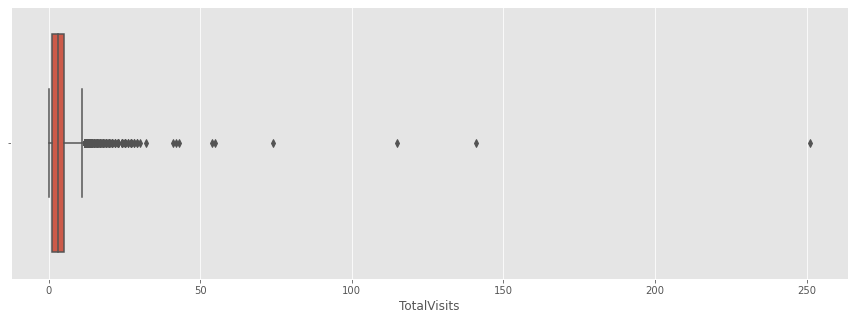

Total Time Spent on Website - Boxplot


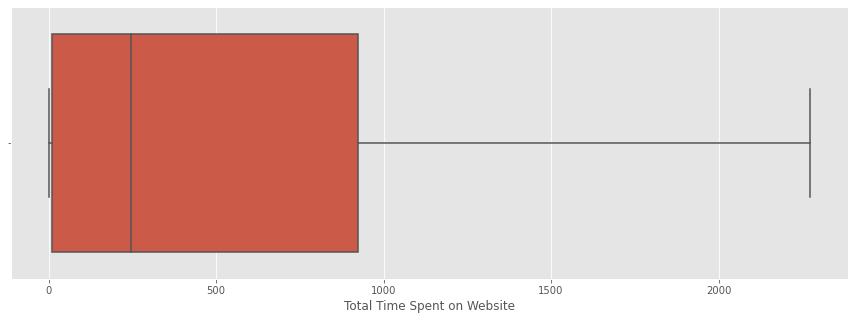

Page Views Per Visit - Boxplot


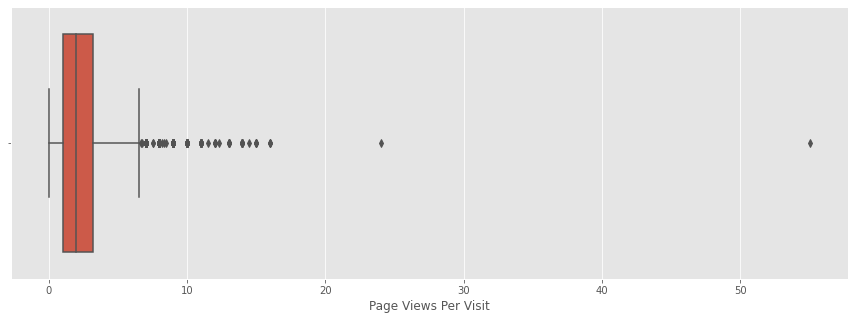

In [122]:
# Lets check the outliers for numerical columns:
def box_plot_for_dummies(col_name):
    print(col_name ,"- Boxplot")
    plt.figure(figsize = (15,5))
    sns.boxplot(new_lead_model[col_name] , hue = new_lead_model['Converted'])
    plt.show()
                
for col in numerical_column:
    box_plot_for_dummies(col)

- Outliers will be handled by Standard Scaler

In [123]:
# Checking outliers at different percentiles
new_lead_model[numerical_column].describe( percentiles = [0.05,0.25,0.5,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
TotalVisits,9074.0,3.456028,4.858802,0.0,0.0,1.0,3.0,5.00,10.0,17.0,251.0
Total Time Spent on Website,9074.0,482.887481,545.256560,0.0,0.0,11.0,246.0,922.75,1557.0,1839.0,2272.0
Page Views Per Visit,9074.0,2.370151,2.160871,0.0,0.0,1.0,2.0,3.20,6.0,9.0,55.0


In [124]:
# Checking the missing values

new_lead_model.isnull().sum()/len(new_lead_model.index) *100

Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Source_Direct Traffic                              0.0
Lead Source_Facebook                                    0.0
Lead Source_Google                                      0.0
Lead Source_Live Chat                                   0.0
Lead Source_NC_EDM                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search                              0.0
Lead Source_Pay per Click Ads                           0.0
Lead Source_Press_Release               

- Data is clean & without any missing values . We can proceed with model building

## 5. Model Development -  Logistic Regression Model Building

###  Create a Train-Test Data Set using Sklearn libaray 

In [125]:
# Create feature variables X 
y = new_lead_model['Converted']

# Create Responsevariable- y
X = new_lead_model.drop('Converted', axis=1)

In [126]:
# Lets check the first 5 rows of the respose variable
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [127]:
# Lets check the first 5 variables of the Response variable y.
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# Splitting the data into train and test using train_test_split from from sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [129]:
# Lets check the shape of X_train data 
X_train.shape

(6351, 80)

In [130]:
# Lets check the y_train shape
y_train.shape

(6351,)

In [131]:
# Lets check the X_test shape
X_test.shape

(2723, 80)

In [132]:
# Lets check the y_test shape
y_test.shape

(2723,)

### Feature Scaling 

In [133]:
# Here we are scaling the continuous features using StandardScaler from sklearn.preprocessing

# Instatiate a StandardScaler Object
scaler = StandardScaler()

# Creating a list of continuous variable to apply the scaler
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Fit_transform the scaler on the continuous features
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Check the top 5 rows to check the transformed data 
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3009,-0.284595,-0.160255,-0.179666,1.473344,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,-0.678728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,-0.678728,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,-0.678728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7987,0.295588,2.017593,0.058552,-0.678728,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
# Lets check the Lead conversion rate

sum(new_lead_model['Converted'])/len(new_lead_model.index) * 100

37.85541106458012

### Correlation
Lets check the highly correlated varibales above 0.8 and drop them.

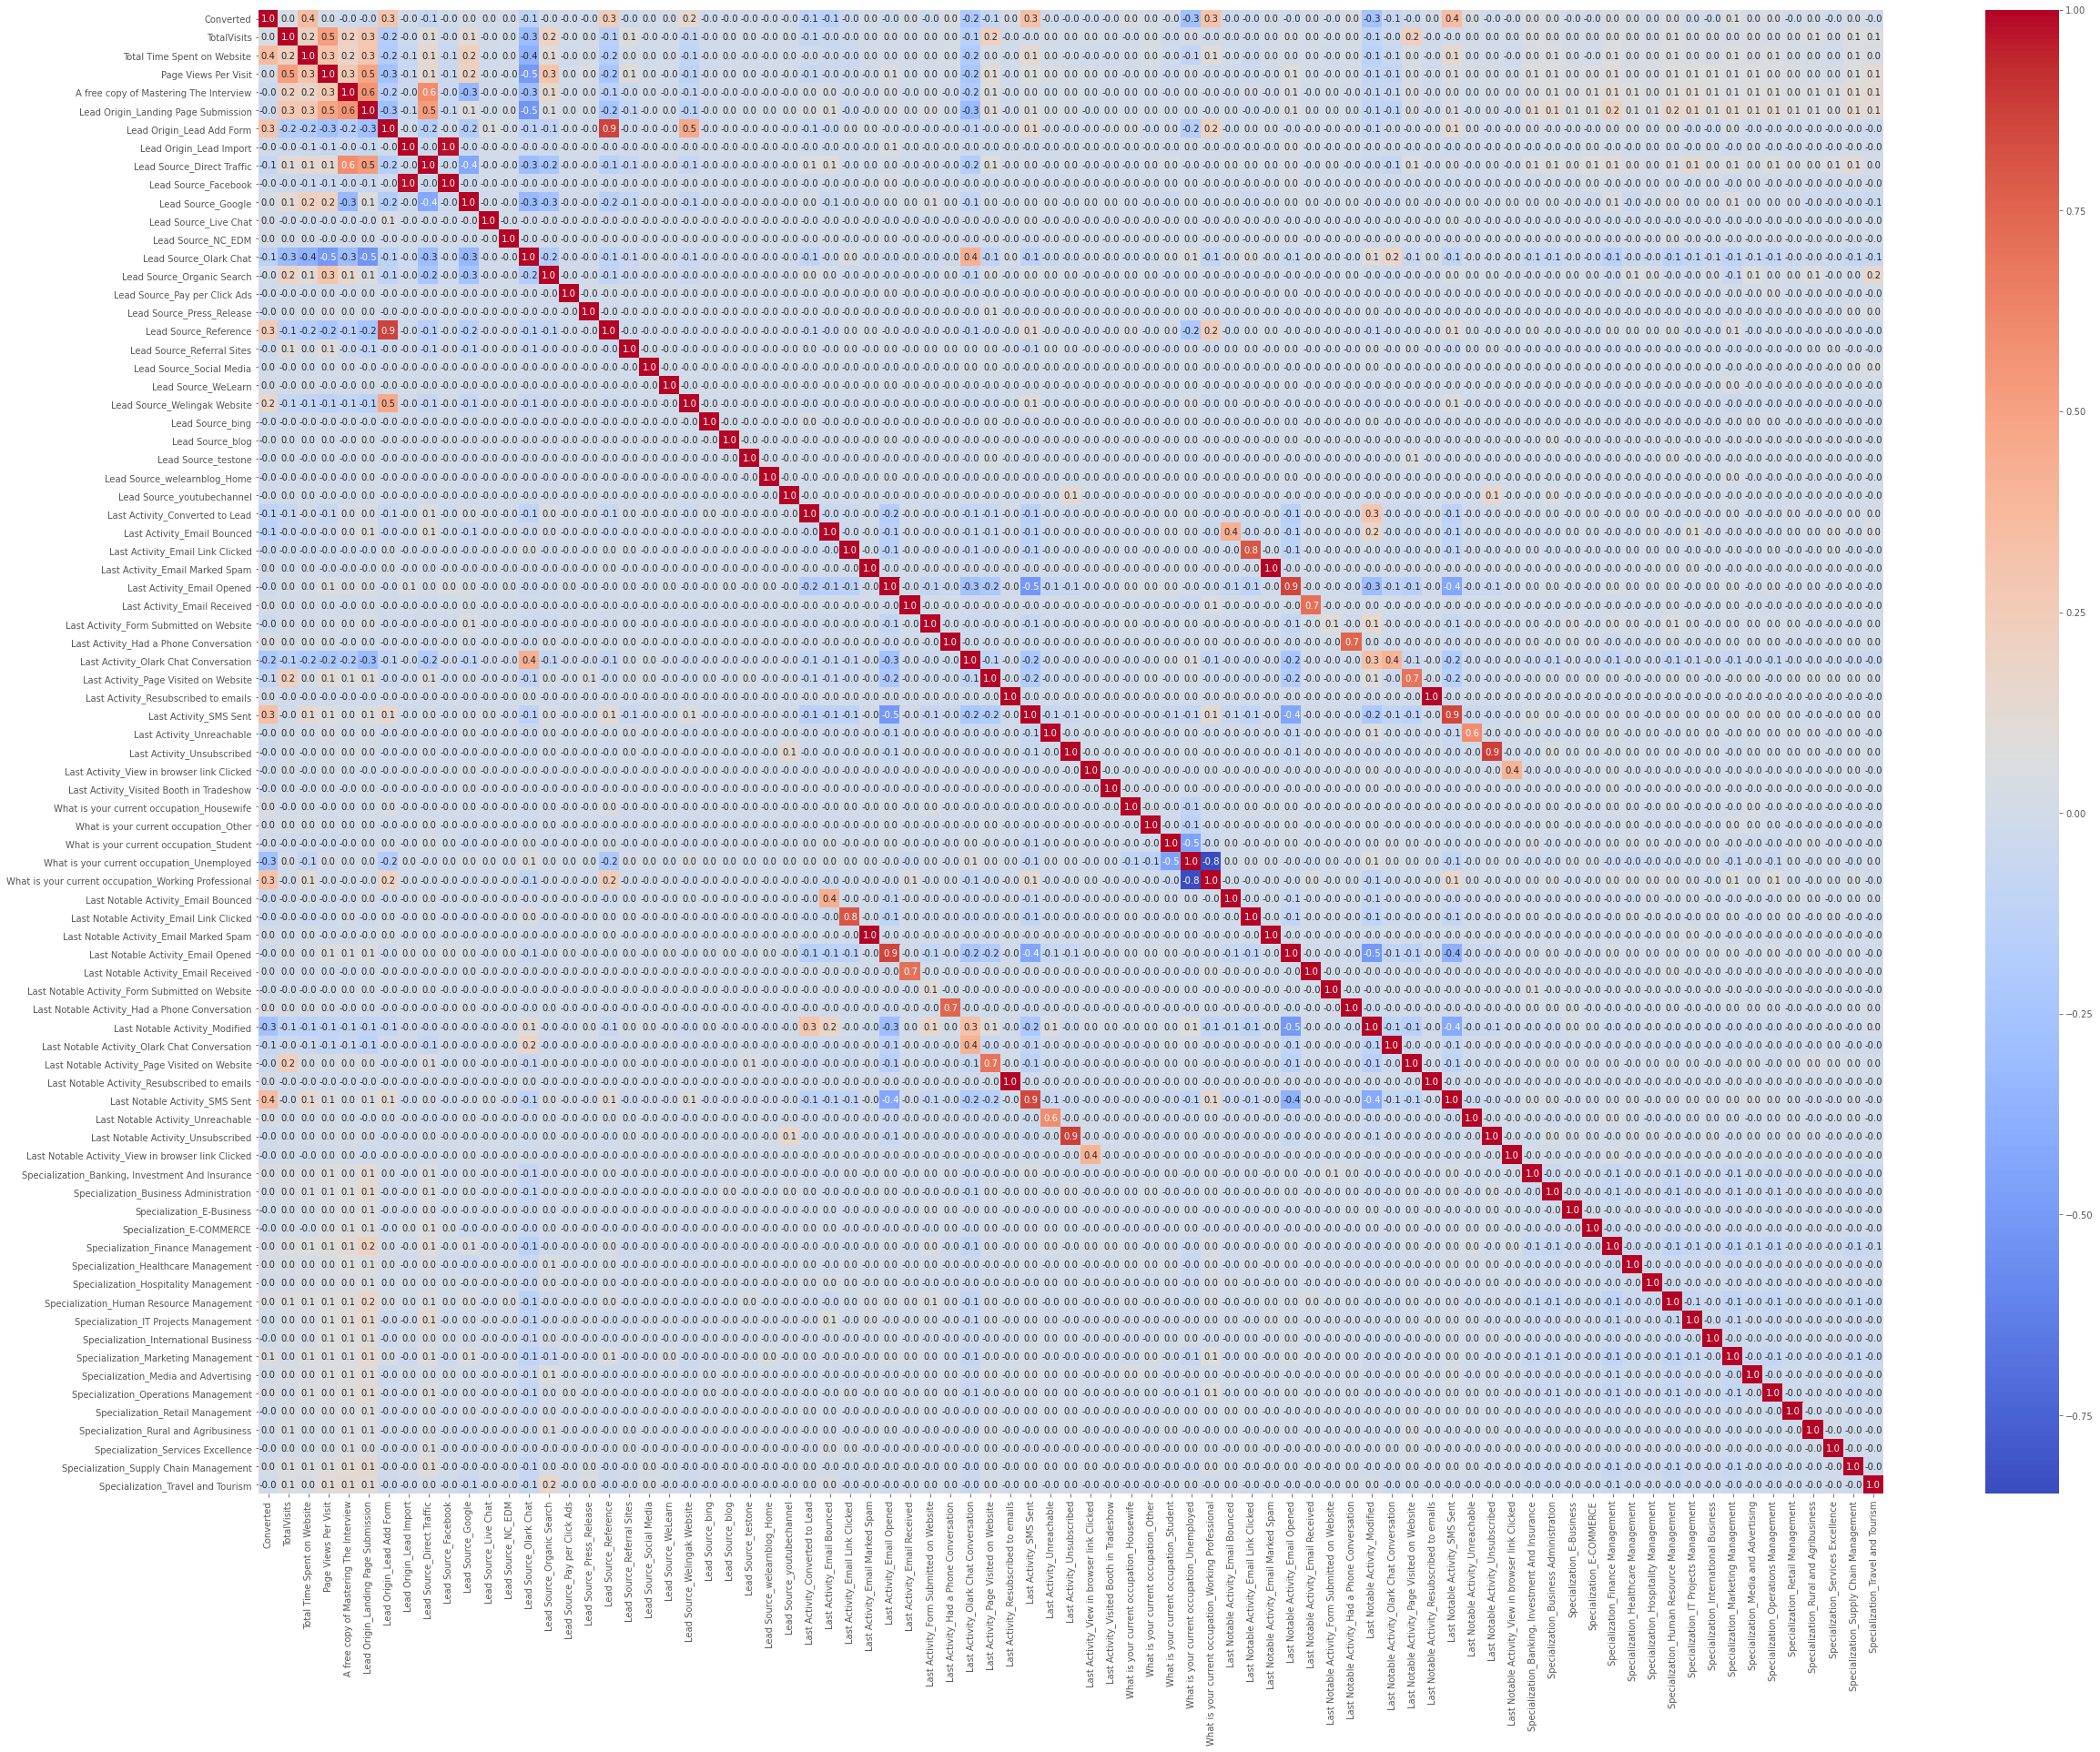

In [135]:
# Lets check if the Multicollinearity persits after dropping the one of the highly correlated features

plt.figure(figsize = (40,30))
sns.heatmap(new_lead_model.corr() , annot = True , fmt = '.1f', cmap = 'coolwarm')
plt.show()

- We can observe that there is Multi-collinearity between newly created dummy variables.
- Lts drop one of the multicollinear variables as one of the correlated feature expalins the other feature.

### Dropping the highly correlated dummy variables from train & test sets

In [136]:
# Checking the top correlated features with value greater than 0.8

new_lead_model.corr()
corr_1 = new_lead_model.corr()
corr_df1 = corr_1.where(np.triu(np.ones(corr_1.shape), k = 1).astype(np.bool))
corr_df1 =corr_df1.unstack().reset_index()
corr_df1.columns = ['Var1' , 'Var2' , 'Correlation']
corr_df1.dropna(subset = ['Correlation'] ,  inplace = True)
corr_df1['Correlation'] = round(corr_df1['Correlation'] , 2).abs()
corr_df1.sort_values (by = 'Correlation' , ascending = False ).head(20)


,Var1,Var2,Correlation
4080,Last Notable Activity_Email Marked Spam,Last Activity_Email Marked Spam,1.00
4735,Last Notable Activity_Resubscribed to emails,Last Activity_Resubscribed to emails,1.00
736,Lead Source_Facebook,Lead Origin_Lead Import,0.98
1383,Lead Source_Reference,Lead Origin_Lead Add Form,0.87
4981,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.87
4162,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.86
3853,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,0.85
4817,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.85
3998,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.80
4408,Last Notable Activity_Had a Phone Conversation,Last Activity_Had a Phone Conversation,0.75


In [137]:
# Lets create a list of highly correlated variables to seperate list & delete one of them

Var1_list = corr_df1[corr_df1['Correlation'] >= 0.8]['Var1'].to_list()
Var2_list = corr_df1[corr_df1['Correlation'] >= 0.8]['Var2'].to_list()

print("Var1 List :", Var1_list)
print("\n")
print("Var1 List :", Var2_list)

drop_dummies = []
for i in Var1_list:
    if i not in Var2_list:
        drop_dummies.append(i)
print("\n")       
print("Dummies varaibes to be dropped :" , drop_dummies )

Var1 List : ['Lead Source_Facebook', 'Lead Source_Reference', 'What is your current occupation_Working Professional', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed']


Var1 List : ['Lead Origin_Lead Import', 'Lead Origin_Lead Add Form', 'What is your current occupation_Unemployed', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed']


Dummies varaibes to be dropped : ['Lead Source_Facebook', 'Lead Source_Reference', 'What is your current occupation_Working Professional', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Resubscribed to emails', 'Last Not

In [138]:
# Lets drop the highly correlated dummy variables from X_test & X_train

X_train = X_train.drop(drop_dummies , axis = 1 )
X_test  = X_test.drop(drop_dummies , axis = 1 )

### Lets check the Correlation Matrix for Multicollinearity

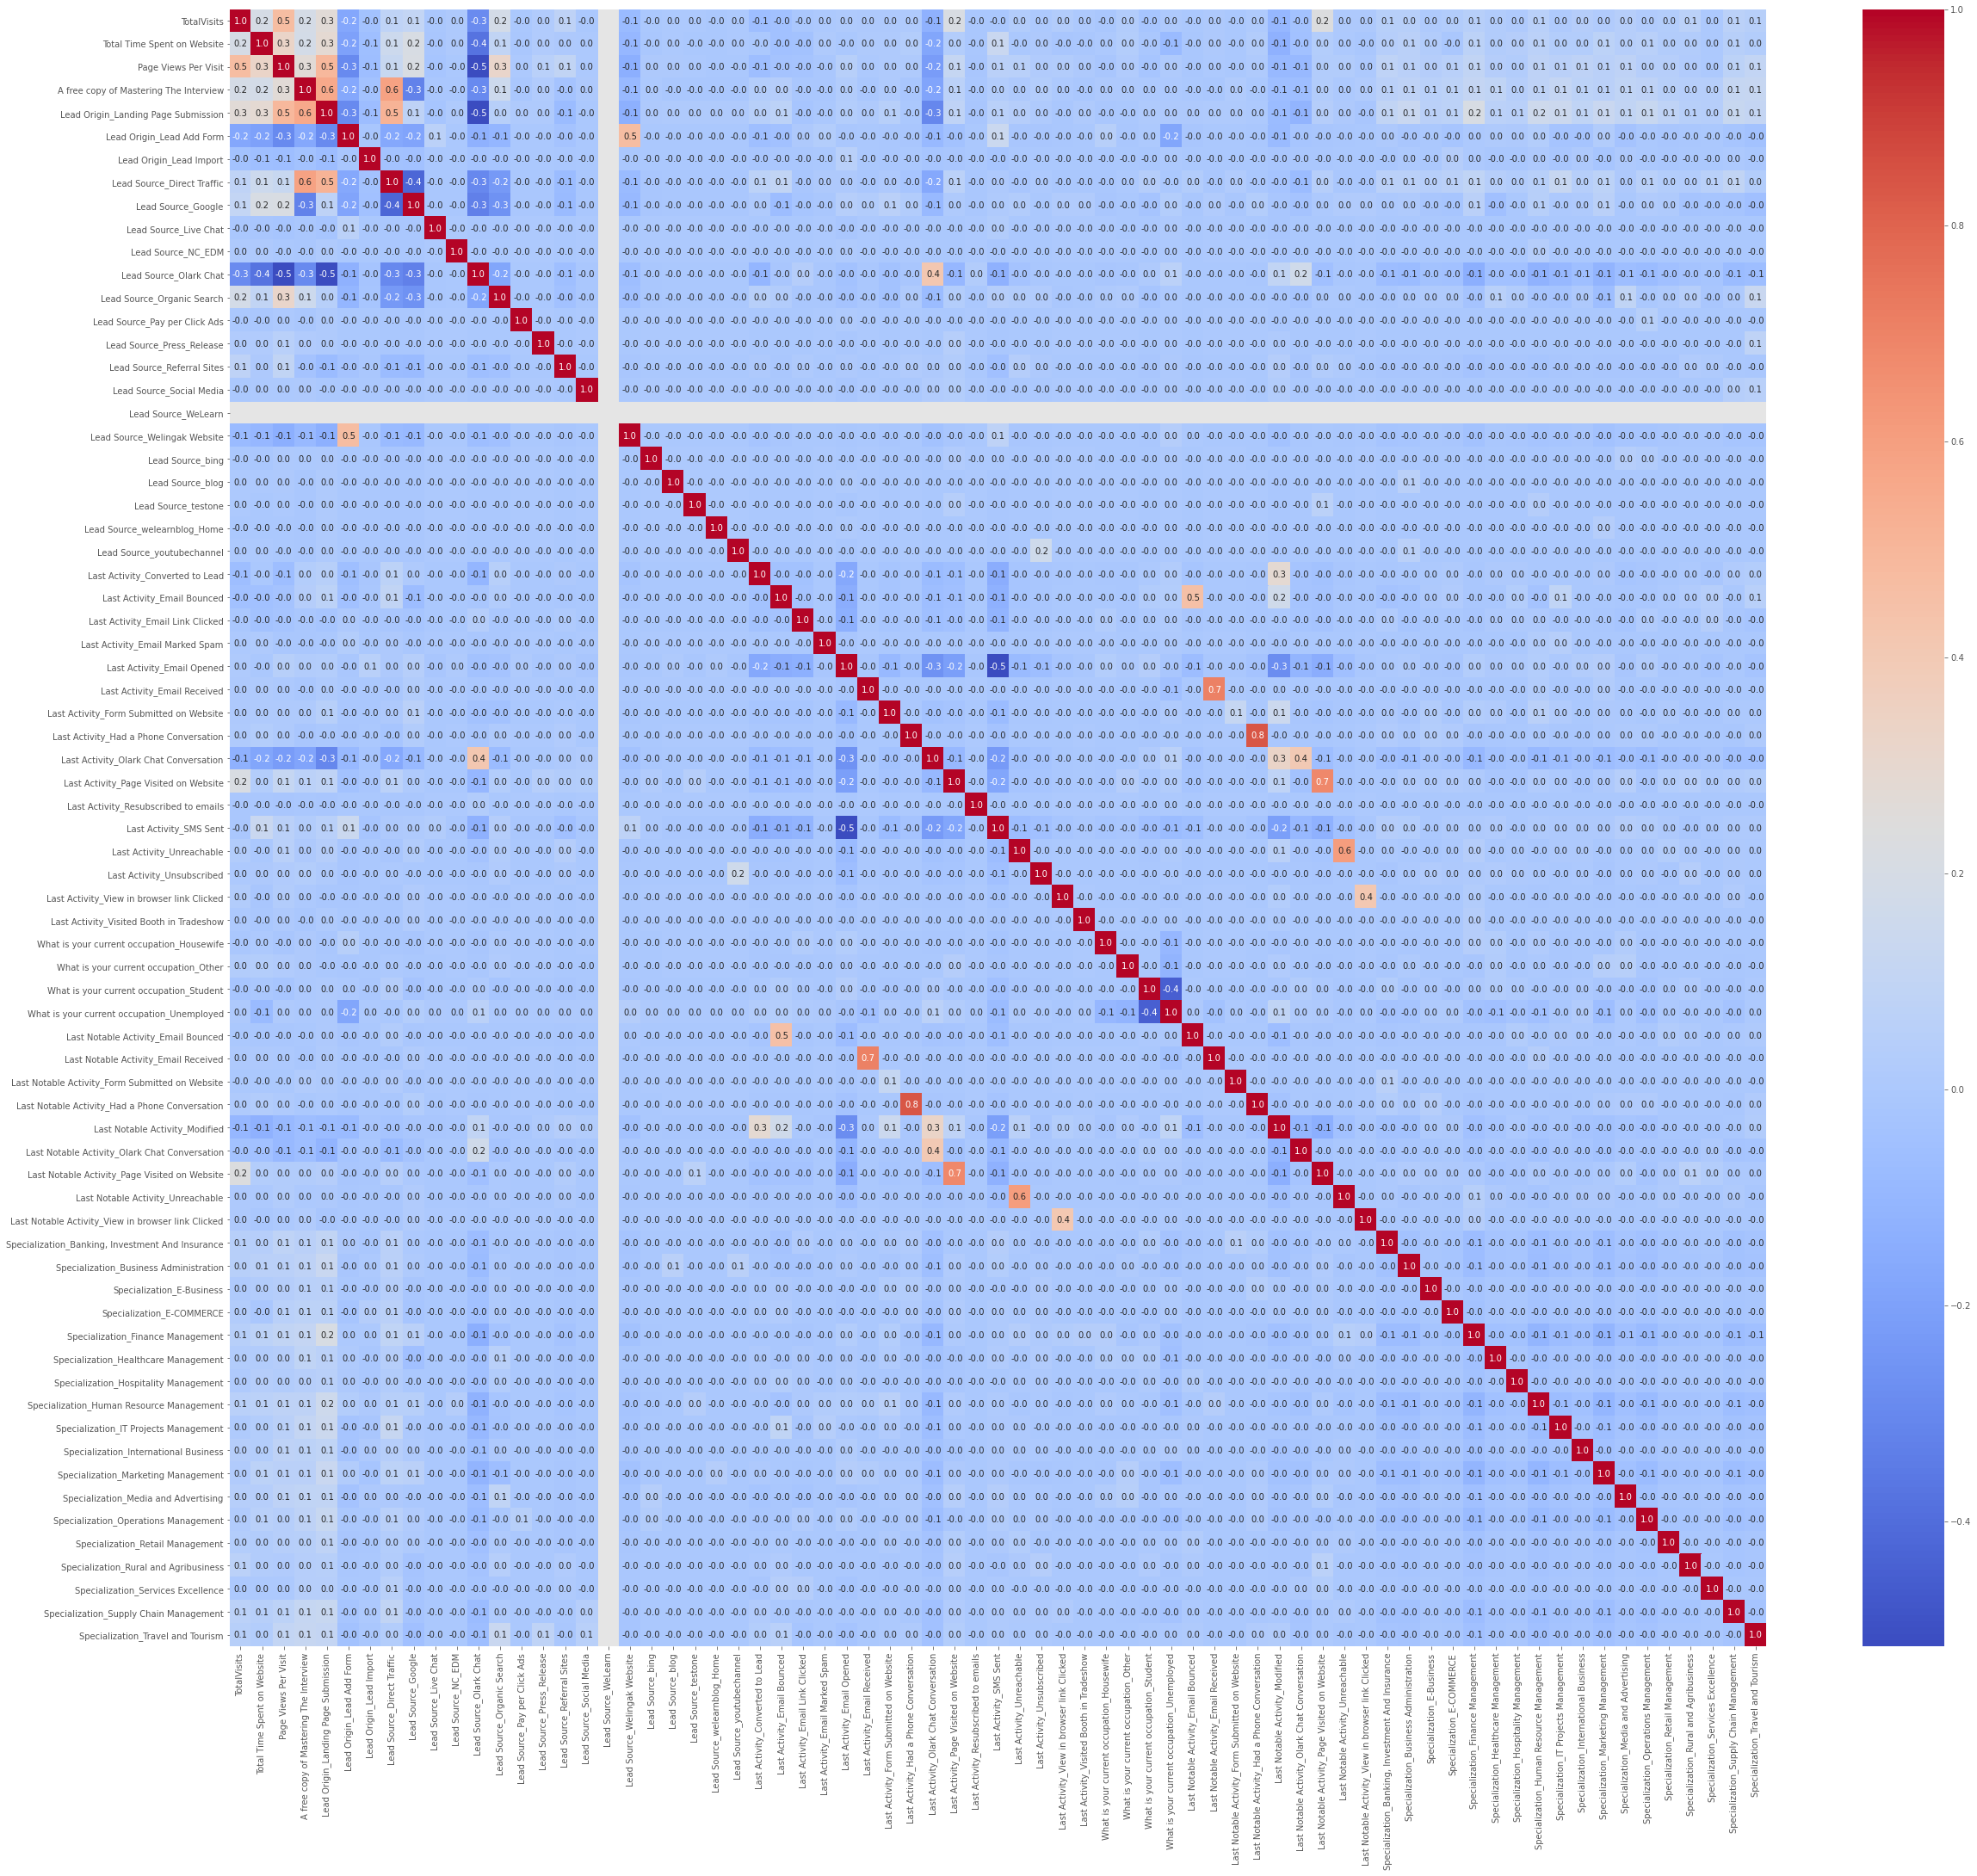

In [139]:
# Lets check if the Multicollinearity persits after dropping the one of the highly correlated features

plt.figure(figsize = (40,35))
sns.heatmap(X_train.corr() , annot = True , fmt = '.1f' , cmap = 'coolwarm')
plt.show()

###  Model Building using  RFE

In [140]:
# Building logistic regression model using sklearn
logreg = LogisticRegression()

In [141]:
# Lets run  RFE with 15 variables
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [142]:
rfe.support_

array([False,  True, False, False, False,  True, False,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [143]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 48),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 49),
 ('A free copy of Mastering The Interview', False, 56),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 31),
 ('Lead Source_Olark Chat', False, 30),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 26),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_WeLearn', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_blog', False, 28),
 ('Lead Source_testone', False, 46),
 ('Lead Source_welearnblog_Home', False, 33),
 ('Lead Source_youtubechannel', False, 35),
 ('Last Activity

In [144]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [145]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Boo

### Assessing the Model with Stats Model

#### Model Number 1 

In [146]:
#BUILDING MODEL #1 using statsmodel.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.6
Date:                Wed, 08 Sep 2021   Deviance:                       5463.3
Time:                        03:49:17   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.5344      0.193     13.100      0.000       2.155       2.914
Total Time Spent on Website                        1.1353      0.040     28.719      0.000       1.058       1.213
Lead Origin_Lead Add Form                          2.5468      0.225     11.317      0.000       2.106       2.988
Lead Source_Direct Traffic                        -1.5802      0.115    -13.770      0.000      -1.805      -1.355
Lead Source_Google                                -1.1633      0.108    -10.728      0.000      -1.376      -0.951
Lead Source_Organic Search                        -1.4006      0.132    -10.620      0.000      -1.659      -1.142
Lead Source_Referral Sites                        -1.5762      0.341     -4.622      0.000      -2.245      -0.908
Lead Source_Welingak Website                       2.0199      0.757      2.669      0.008       0.537       3.503
Last Activity_Email Bounced                       -2.0802      0.370     -5.621      0.000      -2.806      -1.355
Last Activity_Had a Phone Conversation             1.4667      1.030      1.424      0.155      -0.552       3.486
Last Activity_Olark Chat Conversation             -1.4583      0.160     -9.100      0.000      -1.772      -1.144
Last Activity_SMS Sent                             1.2800      0.073     17.564      0.000       1.137       1.423
What is your current occupation_Student           -2.1963      0.276     -7.952      0.000      -2.738      -1.655
What is your current occupation_Unemployed        -2.7092      0.175    -15.496      0.000      -3.052      -2.367
Last Notable Activity_Had a Phone Conversation     2.2013      1.508      1.460      0.144      -0.754       5.157
Last Notable Activity_Unreachable                  1.8569      0.473      3.925      0.000       0.930       2.784
==================================================================================================================
"""

In [147]:
#  p-value of variable 'Last Activity_Had a Phone Conversation' is high (0.155),  hence we can drop it

#### Find Variance Inflation Factor (VIF)

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

# Creating a function to use check VIF for the features

def check_vif_values(X):
    vif = pd.DataFrame()
    X = X_train[col]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
check_vif_values(X_train[col])

,Features,VIF
12,What is your current occupation_Unemployed,5.23
8,Last Activity_Had a Phone Conversation,3.42
13,Last Notable Activity_Had a Phone Conversation,3.41
3,Lead Source_Google,2.65
2,Lead Source_Direct Traffic,2.46
4,Lead Source_Organic Search,1.65
10,Last Activity_SMS Sent,1.54
1,Lead Origin_Lead Add Form,1.52
6,Lead Source_Welingak Website,1.31
9,Last Activity_Olark Chat Conversation,1.31


In [149]:
# Drop column "Last Activity_Had a Phone Conversation" as it has high pvlaue
col = col.drop('Last Activity_Had a Phone Conversation',1)

#### Model Number 2

In [150]:
#BUILDING MODEL #2 
# LEta build a new model after dropin tjhe high p-value feature

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.7
Date:                Wed, 08 Sep 2021   Deviance:                       5465.3
Time:                        03:49:17   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              2.5335      0.193     13.096      0.000       2.154       2.913
Total Time Spent on Website                        1.1355      0.040     28.735      0.000       1.058       1.213
Lead Origin_Lead Add Form                          2.5465      0.225     11.317      0.000       2.105       2.988
Lead Source_Direct Traffic                        -1.5805      0.115    -13.775      0.000      -1.805      -1.356
Lead Source_Google                                -1.1630      0.108    -10.726      0.000      -1.375      -0.950
Lead Source_Organic Search                        -1.3933      0.132    -10.579      0.000      -1.651      -1.135
Lead Source_Referral Sites                        -1.5496      0.337     -4.598      0.000      -2.210      -0.889
Lead Source_Welingak Website                       2.0201      0.757      2.670      0.008       0.537       3.503
Last Activity_Email Bounced                       -2.0831      0.370     -5.629      0.000      -2.808      -1.358
Last Activity_Olark Chat Conversation             -1.4606      0.160     -9.115      0.000      -1.775      -1.147
Last Activity_SMS Sent                             1.2772      0.073     17.536      0.000       1.134       1.420
What is your current occupation_Student           -2.1953      0.276     -7.948      0.000      -2.737      -1.654
What is your current occupation_Unemployed        -2.7068      0.175    -15.484      0.000      -3.049      -2.364
Last Notable Activity_Had a Phone Conversation     3.6660      1.103      3.323      0.001       1.504       5.828
Last Notable Activity_Unreachable                  1.8528      0.473      3.917      0.000       0.926       2.780
==================================================================================================================
"""

In [151]:
#  p-value of all variables are less than 0.05

In [152]:
# Check the vif values

check_vif_values(X_train[col])

,Features,VIF
11,What is your current occupation_Unemployed,5.23
3,Lead Source_Google,2.65
2,Lead Source_Direct Traffic,2.46
4,Lead Source_Organic Search,1.64
9,Last Activity_SMS Sent,1.54
1,Lead Origin_Lead Add Form,1.52
6,Lead Source_Welingak Website,1.31
8,Last Activity_Olark Chat Conversation,1.31
0,Total Time Spent on Website,1.29
10,What is your current occupation_Student,1.10


In [153]:
# Drop column "What is your current occupation_Unemployed" as it has VIF > 5

col = col.drop('What is your current occupation_Unemployed',1)

#### Model Number 3

In [154]:
#BUILDING MODEL #3
# LEts build new model after dropping the high VIF feature

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2908.5
Date:                Wed, 08 Sep 2021   Deviance:                       5816.9
Time:                        03:49:17   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.0449      0.087     -0.515      0.607      -0.216       0.126
Total Time Spent on Website                        1.1501      0.038     29.942      0.000       1.075       1.225
Lead Origin_Lead Add Form                          2.8839      0.219     13.191      0.000       2.455       3.312
Lead Source_Direct Traffic                        -1.5049      0.111    -13.574      0.000      -1.722      -1.288
Lead Source_Google                                -1.1121      0.105    -10.607      0.000      -1.318      -0.907
Lead Source_Organic Search                        -1.3028      0.127    -10.276      0.000      -1.551      -1.054
Lead Source_Referral Sites                        -1.4010      0.311     -4.504      0.000      -2.011      -0.791
Lead Source_Welingak Website                       1.5851      0.756      2.097      0.036       0.104       3.066
Last Activity_Email Bounced                       -2.1577      0.367     -5.886      0.000      -2.876      -1.439
Last Activity_Olark Chat Conversation             -1.5160      0.157     -9.680      0.000      -1.823      -1.209
Last Activity_SMS Sent                             1.2503      0.070     17.813      0.000       1.113       1.388
What is your current occupation_Student            0.3318      0.222      1.496      0.135      -0.103       0.767
Last Notable Activity_Had a Phone Conversation     3.5598      1.092      3.259      0.001       1.419       5.701
Last Notable Activity_Unreachable                  1.8766      0.457      4.109      0.000       0.981       2.772
==================================================================================================================
"""

In [155]:
# All p value "What is your current occupation_Student" is high, so lets drop it.

In [156]:
# Check the vif values

check_vif_values(X_train[col])

,Features,VIF
9,Last Activity_SMS Sent,1.49
1,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.30
3,Lead Source_Google,1.24
2,Lead Source_Direct Traffic,1.22
0,Total Time Spent on Website,1.17
4,Lead Source_Organic Search,1.11
8,Last Activity_Olark Chat Conversation,1.08
7,Last Activity_Email Bounced,1.07
10,What is your current occupation_Student,1.02


In [157]:
# Drop column "What is your current occupation_Student" as it has VIF > 5

col = col.drop('What is your current occupation_Student',1)

#### Model Number 4

In [158]:
#BUILDING MODEL #4
# Lets build a new model after dropping the high p-value feature.

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.5
Date:                Wed, 08 Sep 2021   Deviance:                       5819.1
Time:                        03:49:17   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.0345      0.087     -0.396      0.692      -0.205       0.136
Total Time Spent on Website                        1.1500      0.038     29.945      0.000       1.075       1.225
Lead Origin_Lead Add Form                          2.8862      0.219     13.202      0.000       2.458       3.315
Lead Source_Direct Traffic                        -1.5038      0.111    -13.564      0.000      -1.721      -1.286
Lead Source_Google                                -1.1155      0.105    -10.640      0.000      -1.321      -0.910
Lead Source_Organic Search                        -1.3057      0.127    -10.303      0.000      -1.554      -1.057
Lead Source_Referral Sites                        -1.4104      0.311     -4.537      0.000      -2.020      -0.801
Lead Source_Welingak Website                       1.5748      0.756      2.084      0.037       0.094       3.056
Last Activity_Email Bounced                       -2.1525      0.367     -5.872      0.000      -2.871      -1.434
Last Activity_Olark Chat Conversation             -1.5140      0.157     -9.671      0.000      -1.821      -1.207
Last Activity_SMS Sent                             1.2446      0.070     17.772      0.000       1.107       1.382
Last Notable Activity_Had a Phone Conversation     3.5516      1.092      3.252      0.001       1.411       5.692
Last Notable Activity_Unreachable                  1.8684      0.457      4.091      0.000       0.973       2.763
==================================================================================================================
"""

In [159]:
# All p-values are less than 0.05

In [160]:
# Check the vif values

check_vif_values(X_train[col])

,Features,VIF
9,Last Activity_SMS Sent,1.48
1,Lead Origin_Lead Add Form,1.44
6,Lead Source_Welingak Website,1.30
3,Lead Source_Google,1.23
2,Lead Source_Direct Traffic,1.21
0,Total Time Spent on Website,1.17
4,Lead Source_Organic Search,1.11
8,Last Activity_Olark Chat Conversation,1.08
7,Last Activity_Email Bounced,1.07
11,Last Notable Activity_Unreachable,1.01


In [161]:
# this is our final model as all pvalues <0.05 and VIF's are < 5

In [162]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.5
Date:                Wed, 08 Sep 2021   Deviance:                       5819.1
Time:                        03:49:17   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

#### Inferences:

- Logistic Model Number 4 is the final top 12 significant features which will help in converting the Leads to HOT leads.


- Top significant features are which help to convert Leads to Hot Leads are,

    1. Last Notable Activity_Had a Phone Conversation
    2. Lead Origin_Lead Add Form
    3. Last Notable Activity_Unreachable
    4. Lead Source_Welingak Website
    5. Last Activity_SMS Sent
    6. Total Time Spent on Website  
    
    
- The features which should be improved to convert leads to HOT Leads are,

    1. Lead Source_Google
    2. Lead Source_Organic Search
    3. Lead Source_Referral Sites
    4. Lead Source_Direct Traffic
    5. Last Notable Activity_Olark Chat Conversation
    6. Last Activity_Email Bounced
    

In [163]:
# Now Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

### Let's check the Metrics

In [164]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.151548
1012    0.013232
9226    0.546908
4750    0.831500
7987    0.883577
1281    0.759328
2880    0.103078
4971    0.907561
7536    0.833893
1248    0.863323
dtype: float64

In [165]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15154778, 0.01323182, 0.54690769, 0.83150013, 0.88357682,
       0.75932848, 0.10307848, 0.9075607 , 0.8338934 , 0.86332346])

In [166]:
# Creating a dataframe for actual Hot leads & the converted probabilities 

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.151548,3009
1,0,0.013232,1012
2,0,0.546908,9226
3,1,0.831500,4750
4,1,0.883577,7987


In [167]:
y_train_pred_final.head(20)

,Converted,Converted_prob,Prospect ID
0,0,0.151548,3009
1,0,0.013232,1012
2,0,0.546908,9226
3,1,0.831500,4750
4,1,0.883577,7987
5,1,0.759328,1281
6,0,0.103078,2880
7,1,0.907561,4971
8,1,0.833893,7536
9,0,0.863323,1248


In [168]:
# Lets create a new column 'Predicted' with 1 if Converted_prob > 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.151548,3009,0
1,0,0.013232,1012,0
2,0,0.546908,9226,1
3,1,0.831500,4750,1
4,1,0.883577,7987,1


In [169]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3396  509]
 [ 794 1652]]


In [170]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7948354589828374


In [171]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6753883892068684

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.8696542893725993

In [174]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.13034571062740077


In [175]:
# positive predictive value 
print (TP / float(TP+FP))

0.7644608977325312


In [176]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8105011933174224


#### Plotting the ROC Curve

In [177]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [178]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

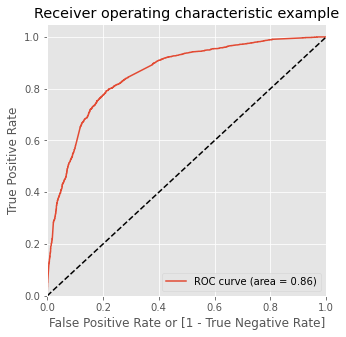

In [179]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

### Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5 We need to determine the best cut-off value and the below section deals with that:

In [180]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.151548,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.013232,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.546908,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.831500,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.883577,7987,1,1,1,1,1,1,1,1,1,1,0


In [181]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.547000  0.975061  0.278873
0.2   0.2  0.705401  0.921504  0.570038
0.3   0.3  0.770745  0.822567  0.738284
0.4   0.4  0.794048  0.744072  0.825352
0.5   0.5  0.794835  0.675388  0.869654
0.6   0.6  0.766966  0.534751  0.912420
0.7   0.7  0.748386  0.441946  0.940333
0.8   0.8  0.726500  0.342600  0.966965
0.9   0.9  0.673122  0.170482  0.987964


<Figure size 576x360 with 0 Axes>

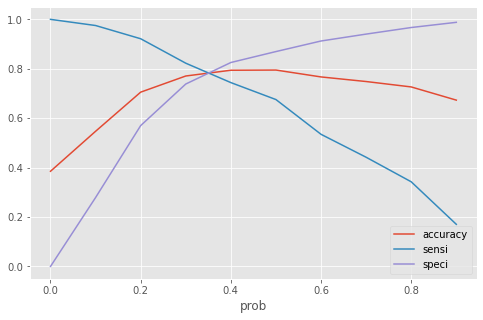

In [182]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (8,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'] , figsize = (8,5))
plt.show()

From the above we can consider 0.35 as the optimal Cutoff - Probability.

In [183]:
# From the curve above, 0.35 is the optimum point to take it as a cutoff probability.
# Lets create a new column "final_Predicted" to find the predicted Conversion.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.151548,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.013232,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.546908,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.831500,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.883577,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [184]:
# Lets create the column 'Lead Score' to understand the lead to Hot Lead conversion

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.151548,3009,0,15
1,0,0.013232,1012,0,1
2,0,0.546908,9226,1,55
3,1,0.831500,4750,1,83
4,1,0.883577,7987,1,88


In [185]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7886946937490159

In [186]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3085,  820],
       [ 522, 1924]], dtype=int64)

In [187]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7865903515944399

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.7900128040973111

###### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is good. We have the following values for the Train Data:

Accuracy : 78.87%

Sensitivity : 78.66%

Specificity : 79.00%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [190]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20998719590268886


In [191]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7011661807580175


In [192]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8552813972830607


### Precision & Recall

In [193]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3085,  820],
       [ 522, 1924]], dtype=int64)

In [194]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7011661807580175

In [195]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7865903515944399

In [196]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7011661807580175

In [197]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7865903515944399

### Precision & Recall Trade-off

In [198]:
# Lets calculate the Precision , recall & plot the curve using  y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

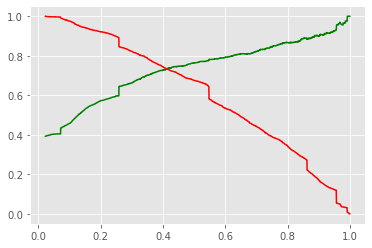

In [199]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the above we can observe 0.41 is the Precision & Recall  Trade-Off point.

## 6. Predicions on Test set

In [200]:
#scaling test set

num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3271,0.102194,-0.600595,0.773206,-0.678728,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,0.295588,1.887326,1.249642,1.473344,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7936,-0.284595,-0.752879,-0.179666,-0.678728,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,-0.671384,-0.888650,-1.132538,-0.678728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3830,0.875771,-0.587751,2.678951,1.473344,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [201]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,-0.600595,0,0,1,0,0,0,0,0,0,0,0
1490,1.887326,0,1,0,0,0,0,0,0,0,0,0
7936,-0.752879,0,0,1,0,0,0,0,0,0,0,0
4216,-0.888650,1,0,0,0,0,0,0,0,0,0,0
3830,-0.587751,0,0,0,1,0,0,0,0,0,0,0


In [202]:
X_test_sm = sm.add_constant(X_test)

In [203]:
y_test_pred = res.predict(X_test_sm)

In [204]:
y_test_pred[:10]

3271    0.136976
1490    0.653011
7936    0.117557
4216    0.861736
3830    0.117526
1800    0.117995
6507    0.341843
4821    0.245798
4223    0.955825
4714    0.546908
dtype: float64

In [205]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [206]:
# Let's see the head
y_pred_1.head()

,0
3271,0.136976
1490,0.653011
7936,0.117557
4216,0.861736
3830,0.117526


In [207]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [208]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [209]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [210]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [211]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.136976
1,1,1490,0.653011
2,0,7936,0.117557
3,1,4216,0.861736
4,0,3830,0.117526


In [212]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [213]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.136976
1,1,1490,0.653011
2,0,7936,0.117557
3,1,4216,0.861736
4,0,3830,0.117526


In [214]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [215]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.136976,14
1,1490,1,0.653011,65
2,7936,0,0.117557,12
3,4216,1,0.861736,86
4,3830,0,0.117526,12


In [216]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)

In [217]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3271,0,0.136976,14,0
1,1490,1,0.653011,65,1
2,7936,0,0.117557,12,0
3,4216,1,0.861736,86,1
4,3830,0,0.117526,12,0


In [218]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7950789570326845

In [219]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1451,  283],
       [ 275,  714]], dtype=int64)

In [220]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [221]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7219413549039434

In [222]:
# Let us calculate specificity
TN / float(TN+FP)

0.8367935409457901

In [223]:
# Lets check Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7161484453360081

In [224]:
# Lets cehck the Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7219413549039434

##### Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 79.50%

Sensitivity : 72.19%

Specificity : 83.67%

Precision : 71.61%

Recall : 72.19%

## Final Observation:

Let us compare the values obtained for Train & Test:

#### Train Data: 

Accuracy : 78.87%

Sensitivity : 78.66%

Specificity : 79.00%

#### Test Data: 

Accuracy : 79.50%

Sensitivity : 72.19%

Specificity : 83.67%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.

## 7. Final Conclusion

#### Recommendation to the CEO:

 This Logistic Model has all the top  12 significant features which will help in converting the Leads to HOT leads.


- Top significant features are which help to convert Leads to Hot Leads are,

    1. Last Notable Activity_Had a Phone Conversation
    2. Lead Origin_Lead Add Form
    3. Last Notable Activity_Unreachable
    4. Lead Source_Welingak Website
    5. Last Activity_SMS Sent
    6. Total Time Spent on Website  
    
    
- The features which should be improved to convert leads to HOT Leads are,

    1. Lead Source_Google
    2. Lead Source_Organic Search
    3. Lead Source_Referral Sites
    4. Lead Source_Direct Traffic
    5. Last Notable Activity_Olark Chat Conversation
    6. Last Activity_Email Bounced



#     THANK YOU

## Submitted by 
### Ramasubramniam S
### Gayathri MNVL